<a href="https://colab.research.google.com/github/emms204/Laduma-Analytics-Football-League-Winners-Prediction-Challenge/blob/main/Laduma_Analytics_Football_League_Winners_Prediction_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import modules

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
root_path = '/content/gdrive/MyDrive/LADUMA ANALYTICS' 
import os
os.chdir(root_path)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from datetime import datetime
from datetime import timedelta

pd.set_option('display.max_columns', None)

In [ ]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


###GBM GPU SETUP

In [ ]:
!pip uninstall -y lightgbm

Found existing installation: lightgbm 2.2.3
Uninstalling lightgbm-2.2.3:
  Successfully uninstalled lightgbm-2.2.3


In [ ]:
!cd LightGBM/python-package/;python setup.py install --precompile

running install
running build
running build_py
INFO:root:Generating grammar tables from /usr/lib/python3.7/lib2to3/Grammar.txt
INFO:root:Generating grammar tables from /usr/lib/python3.7/lib2to3/PatternGrammar.txt
running egg_info
writing lightgbm.egg-info/PKG-INFO
writing dependency_links to lightgbm.egg-info/dependency_links.txt
writing requirements to lightgbm.egg-info/requires.txt
writing top-level names to lightgbm.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
no previously-included directories found matching 'build'
writing manifest file 'lightgbm.egg-info/SOURCES.txt'
copying lightgbm/VERSION.txt -> build/lib/lightgbm
running install_lib
creating /usr/local/lib/python3.7/dist-packages/lightgbm
copying build/lib/lightgbm/basic.py -> /usr/local/lib/python3.7/dist-packages/lightgbm
copying build/lib/lightgbm/__init__.py -> /usr/local/lib/python3.7/dist-packages/lightgbm
copying build/lib/lightgbm/callback.py -> /usr/local/lib/python3.7/dist-packages/lightgbm
copyin

In [ ]:
!mkdir -p /etc/OpenCL/vendors && echo "libnvidia-opencl.so.1" > /etc/OpenCL/vendors/nvidia.icd

In [ ]:
#os.chdir(root_path)
!pip uninstall xgboost

Found existing installation: xgboost 0.90
Uninstalling xgboost-0.90:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/xgboost-0.90.dist-info/*
    /usr/local/lib/python3.7/dist-packages/xgboost/*
    /usr/local/xgboost/libxgboost.so
Proceed (y/n)? y
  Successfully uninstalled xgboost-0.90


In [ ]:
!pip install xgboost-1.6.1+a55d3bdde2042b3cd866d3e64dab4dff6c344798-py3-none-manylinux2014_x86_64.whl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./xgboost-1.6.1+a55d3bdde2042b3cd866d3e64dab4dff6c344798-py3-none-manylinux2014_x86_64.whl


###Load the data provided

In [ ]:
Train = pd.read_csv("/content/Train.csv",parse_dates=['Date'])

In [ ]:
Train.head()

,Date,Season,Match_ID,Game_ID,Home Team,Away Team,Score
0,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win
1,2016-09-14,1,12.0,ID_T7H1XN5Z,Andromeda,Antennae,Draw
2,2016-12-12,1,13.0,ID_O1P9FGN4,Andromeda,Butterfly,Away win
3,2017-01-25,1,14.0,ID_TR5M4KQV,Andromeda,Cigar,Away win
4,2016-08-24,1,15.0,ID_EOIECRE2,Andromeda,Circinus,Home Win


In [ ]:
Test = pd.read_csv("/content/Test.csv",parse_dates=['Date'])

In [ ]:
Test.head()

,Date,Season,Match_ID,Game_ID,Home Team,Away Team
0,2018-12-08,3,102.0,ID_8518U587,Antennae,Cosmos Redshift 7
1,2018-09-11,3,18.0,ID_H49BIKG7,Cosmos Redshift 7,Tadpole
2,2018-09-25,3,32.0,ID_PO6SP4VA,Cosmos Redshift 7,Medusa Merger
3,2018-10-02,3,40.0,ID_MZRCNBAQ,Cartwheel,Cosmos Redshift 7
4,2018-12-20,3,123.0,ID_CV9VOLIU,Cosmos Redshift 7,Needle


In [ ]:
test_game_statistics = pd.read_csv("/content/gdrive/MyDrive/LADUMA ANALYTICS/test_game_statistics.csv")

In [ ]:
train_game_statistics = pd.read_csv("/content/gdrive/MyDrive/LADUMA ANALYTICS/train_game_statistics.csv")

In [ ]:
train_game_statistics.head()

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season,Manager,Opposition_Team,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,next_player,next_action,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_ZZKYYPVY,Player_J0V7B0YE,4.0,39.5,33.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_ZZKYYPVY,Player_J0V7B0YE,5.0,39.5,33.0,Circinus,Inaccurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_game_statistics.isnull().sum()

Game_ID                    0
Player_ID                  0
id                         0
X                          0
Y                          0
Team                       0
Action                     0
Half                       0
Season                     0
Manager                    0
Opposition_Team            0
Shots                      0
SoT                        0
Goals_scored               0
Goals_conceded             0
Accurate passes            0
Inaccurate passes          0
Passes                     0
Start_minutes              0
End_minutes                0
next_player          1571577
next_action          1571577
next_x               1571577
next_y               1571577
event_id             1571577
next_team            1571577
next_event_id        1571577
xt_value             1571577
dtype: int64

In [ ]:
test_game_statistics.head()

,Game_ID,Player_ID,id,X,Y,Team,Half,Season,Manager,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,next_player,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,ID_ZUPS2JD2,Player_5CBBVY85,1.0,52.5,34.0,Milky Way,1st half,3,Masashi,Sunflower,0.0,0.0,1.0,0.0,1.0,0.68,1.02,Player_INTSA2WQ,37.5,30.9,0.0,Milky Way,1.0,-0.002220
1,ID_ZUPS2JD2,Player_5CBBVY85,2.0,52.5,34.0,Milky Way,1st half,3,Masashi,Sunflower,0.0,0.0,0.0,0.0,0.0,0.68,1.02,Player_5CBBVY85,52.5,34.0,0.0,Milky Way,0.0,0.000000
2,ID_ZUPS2JD2,Player_INTSA2WQ,3.0,37.5,30.9,Milky Way,1st half,3,Masashi,Sunflower,0.0,0.0,0.0,0.0,0.0,0.70,1.03,Player_INTSA2WQ,37.5,30.9,1.0,Milky Way,1.0,0.000000
3,ID_ZUPS2JD2,Player_INTSA2WQ,4.0,37.5,30.9,Milky Way,1st half,3,Masashi,Sunflower,0.0,0.0,1.0,0.0,1.0,0.70,1.03,Player_1AJ0QRLU,79.0,57.2,1.0,Sunflower,2.0,0.016906
4,ID_ZUPS2JD2,Player_1AJ0QRLU,5.0,26.0,10.8,Sunflower,1st half,3,Frodo,Milky Way,0.0,0.0,0.0,0.0,0.0,0.77,1.10,Player_75QJWOU4,79.0,57.2,2.0,Milky Way,3.0,0.000000


In [ ]:
test_game_statistics.isnull().sum()

Game_ID                 0
Player_ID               0
id                      0
X                       0
Y                       0
Team                    0
Half                   11
Season                  0
Manager              5602
Opposition_Team         0
Shots                  92
SoT                    92
Accurate passes        92
Inaccurate passes      92
Passes                 92
Start_minutes          10
End_minutes             0
next_player           212
next_x                212
next_y                212
event_id                0
next_team             209
next_event_id         212
xt_value                0
dtype: int64

In [ ]:
Train.shape, Test.shape, train_game_statistics.shape, test_game_statistics.shape

((412, 7), (234, 6), (1571577, 28), (780234, 24))

### Data EDA and Visualisation.

- Lets analyze the data provided by anaswering some few questions

In [ ]:
Train

,Date,Season,Match_ID,Game_ID,Home Team,Away Team,Score
0,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win
1,2016-09-14,1,12.0,ID_T7H1XN5Z,Andromeda,Antennae,Draw
2,2016-12-12,1,13.0,ID_O1P9FGN4,Andromeda,Butterfly,Away win
3,2017-01-25,1,14.0,ID_TR5M4KQV,Andromeda,Cigar,Away win
4,2016-08-24,1,15.0,ID_EOIECRE2,Andromeda,Circinus,Home Win
...,...,...,...,...,...,...,...
407,2016-08-28,1,59.0,ID_PREVA6HZ,Sculptor,Medusa Merger,Away win
408,2017-02-19,1,151.0,ID_9DJ219JY,Medusa Merger,Sculptor,Home Win
409,2016-10-23,1,154.0,ID_A1PN23J6,Medusa Merger,Sombrero,Home Win
410,2017-08-16,1,171.0,ID_XFQO60PZ,Milky Way,Sculptor,Draw


In [ ]:
Train.nunique(),Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       412 non-null    datetime64[ns]
 1   Season     412 non-null    int64         
 2   Match_ID   412 non-null    float64       
 3   Game_ID    412 non-null    object        
 4   Home Team  412 non-null    object        
 5   Away Team  412 non-null    object        
 6   Score      412 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 22.7+ KB


(Date         183
 Season         2
 Match_ID     224
 Game_ID      412
 Home Team     19
 Away Team     19
 Score          3
 dtype: int64, None)

In [ ]:
Train['Date'].max(),Train['Date'].min()

(Timestamp('2018-06-05 00:00:00'), Timestamp('2016-08-03 00:00:00'))

In [ ]:
Train['Date'].max() - Train['Date'].min()

Timedelta('671 days 00:00:00')

##### How many seasons are in train and test ?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


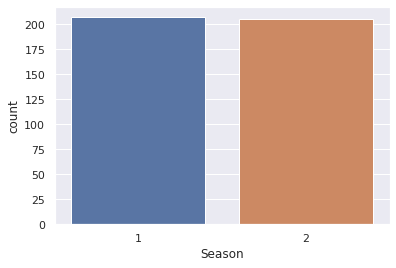

In [ ]:
sns.countplot(Train["Season"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


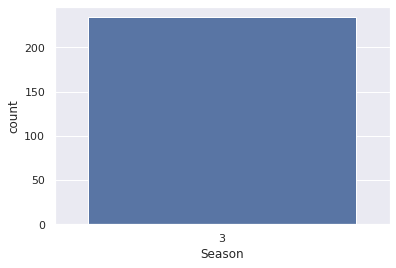

In [ ]:
sns.countplot(Test["Season"])

- We can see that 2 seasons are provided in the training data while one season is provided in the the test

#### How many unique match IDs are provided?

- From a football perspective, can you find out what's a match, are matches specific to every season?

In [ ]:
Train.Match_ID.nunique()

224

In [ ]:
Test.Match_ID.nunique()

213

#### How many games were played in train seasons and test seasons?

In [ ]:
Train.Game_ID.nunique()

412

In [ ]:
Test.Game_ID.nunique()

234

#### How many teams were away and home?

In [ ]:
Train["Home Team"].nunique()

19

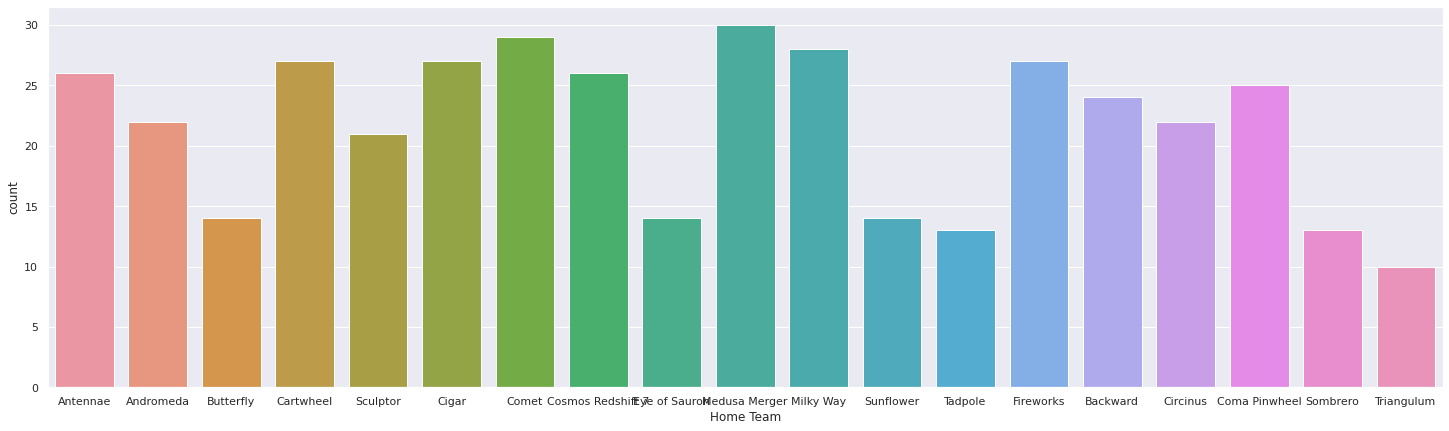

In [ ]:
plt.figure(figsize=(25,7))
sns.countplot(x=Train["Home Team"])

In [ ]:
Train["Away Team"].nunique()

19

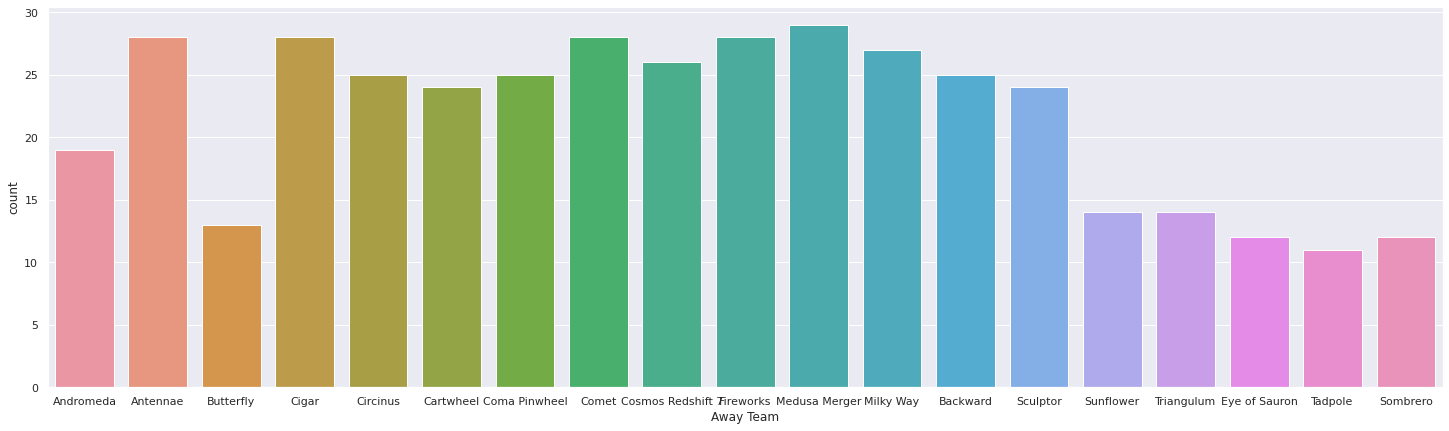

In [ ]:
plt.figure(figsize=(25,7))
sns.countplot(x=Train["Away Team"])

In [ ]:
Test["Home Team"].nunique()

16

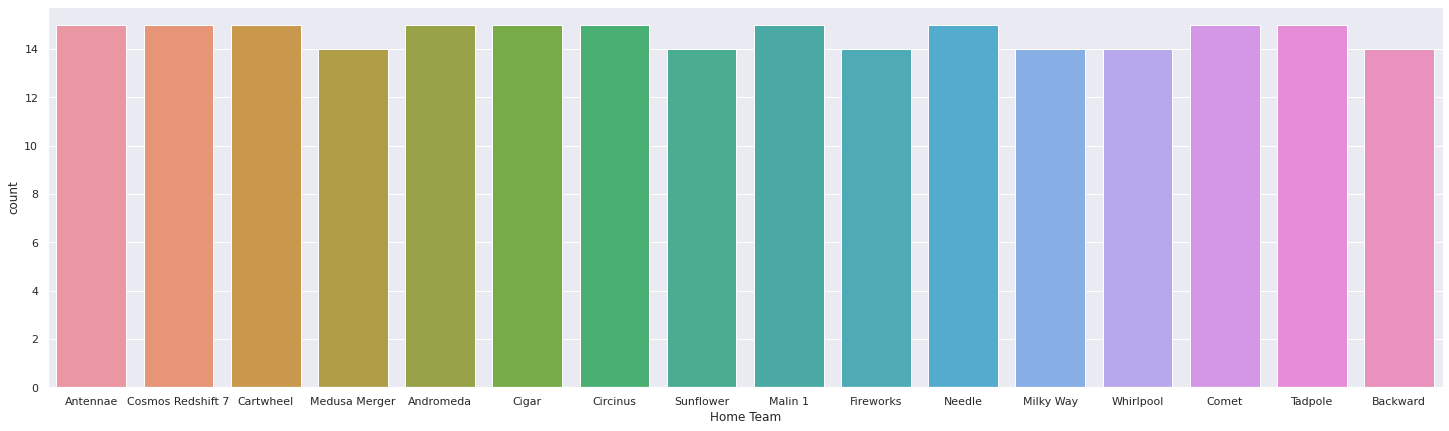

In [ ]:
plt.figure(figsize=(25,7))
sns.countplot(x=Test["Home Team"])

In [ ]:
Test["Away Team"].nunique()

16

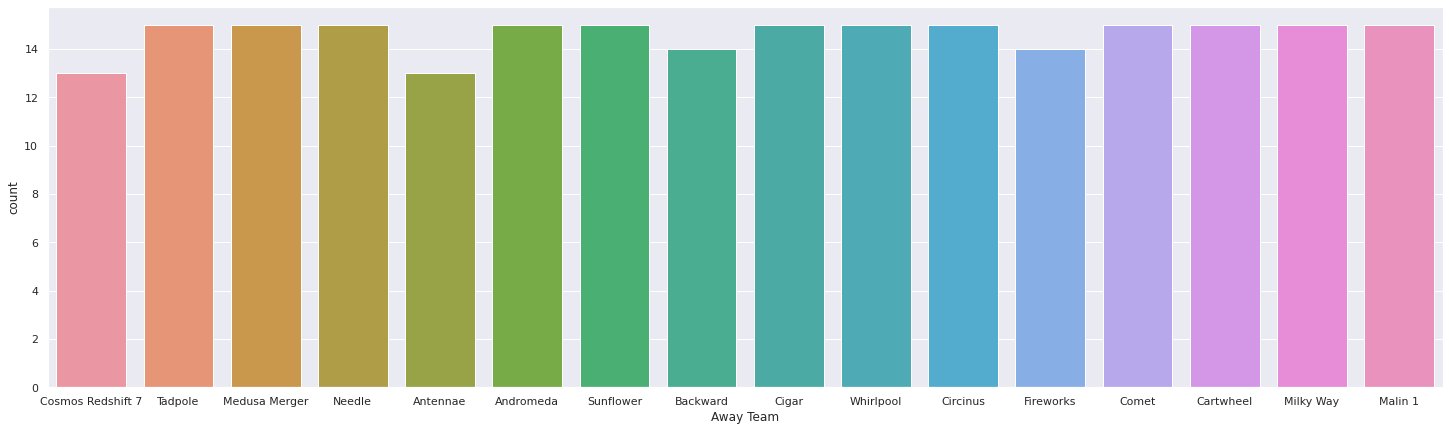

In [ ]:
plt.figure(figsize=(25,7))
sns.countplot(x=Test["Away Team"])

- We can see that the number of teams in Home and away are equal in both cases, however the test count of the teams is more balance than the train, could this be as a result of 1 season in test and 2 seasons in the train? For the train can you countplot per season?

#### Did the team Win, Lose or Draw?

- Let's look at the target column, the reason for creating our machine leaning model, the goal of every footbal game is to determine the winner

In [ ]:
Train["Score"].nunique()

3

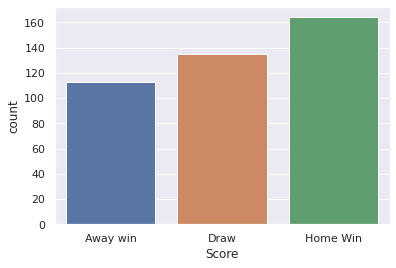

In [ ]:
sns.countplot(x=Train["Score"])

We have 3 classifications, did the away team win, did both teams draw or did the home team win? We can see that in most cases the home team won. There's much more you can do with this field:

    - Look at every team, the number of games played? did they win or lose, are most of their wins during home or away game?

- **You can do more EDAs on the game statistics file**

### Feature Engineering and Modelling

#### Game statistics 

- This file shows how the game was played from start to end, the actions of the game, which player was it passed to etc.
- We will need to merge this with the train and test data provided.

In [ ]:
Train["Train"] = 1
Test["Train"]= 0

train_test = pd.concat([Train, Test])

In [ ]:
train_test.shape

(646, 8)

In [ ]:
game_statistics = pd.concat([train_game_statistics, test_game_statistics])

In [ ]:
all_data = game_statistics.merge(train_test, on="Game_ID")

In [ ]:
all_data.head(5)

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season_x,Manager,Opposition_Team,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,next_player,next_action,next_x,next_y,event_id,next_team,next_event_id,xt_value,Date,Season_y,Match_ID,Home Team,Away Team,Score,Train
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1
3,ID_ZZKYYPVY,Player_J0V7B0YE,4.0,39.5,33.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1
4,ID_ZZKYYPVY,Player_J0V7B0YE,5.0,39.5,33.0,Circinus,Inaccurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1


In [ ]:
all_data['Action'].unique()

array(['Accurate passes', 'Positional attacks', 'Inaccurate passes',
       'Interceptions', 'Opp half interceptions', 'Lost balls',
       'Picking-ups', 'Unsuccessful tackles', 'Successful dribbles',
       'Counter-attacks', 'Challenges lost', 'Challenges won',
       'Accurate key passes', 'Accurate crosses',
       'Passes into the penalty box', 'Errors', 'Bad ball control',
       'Shot on target (saved)', 'Supersaves', 'Shot on target', 'Shots',
       'Corner attacks', 'Air challenges lost', 'Air challenges won',
       'Offsides', 'Goal kicks', 'Opp half lost balls',
       'Wide shot (Goalkeepers)', 'Wide shot', 'Successful tackles',
       'Opp half pick-ups', 'Unsuccessful dribbles',
       'Inaccurate key passes', 'Fouls', 'Free-kick attacks',
       'Throw-in attacks', 'Inaccurate crosses', 'Assists', 'Goals',
       'Goals conceded', 'Errors leading to goal', 'Penalty',
       'Penalty attack', 'Dribbling', 'Not forced mistake',
       'Extra attacking pass', 'Inaccurate

In [ ]:
#all_data.loc[(all_data['Action']=='Own goal') | (all_data['Action']=='Goals') | (all_data['Action']=='Goals conceded')]

In [ ]:
#sns.catplot(x='Team',hue='Score',data=all_data,kind='count',height=10,aspect=4)

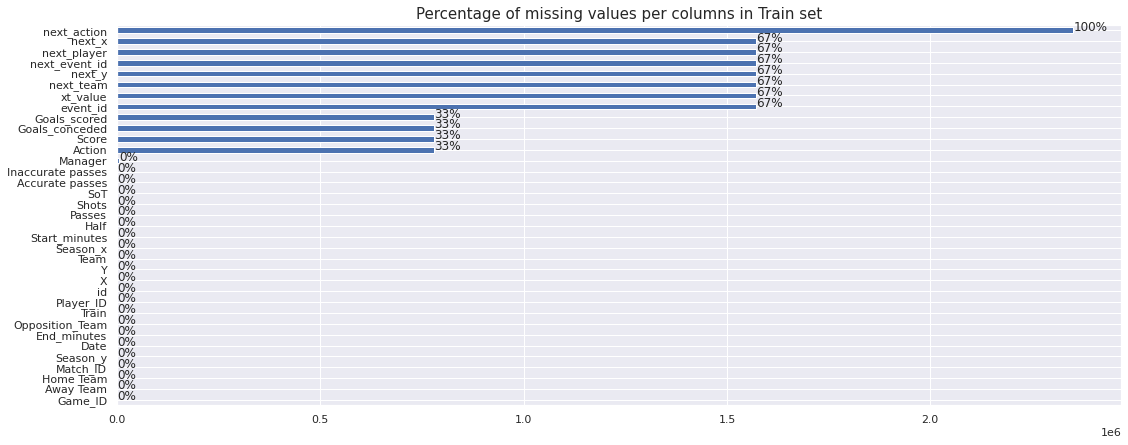

In [ ]:
ax = all_data.isna().sum().sort_values().plot(kind='barh', figsize=(18,7))
plt.title('Percentage of missing values per columns in Train set', fontdict={'size':15})
for p in ax.patches:
  percentage = '{:,.0f}%'.format((p.get_width()/all_data.shape[0])*100)
  width, height = p.get_width(), p.get_height()
  x = p.get_x()+width+0.2  
  y = p.get_y()+height/2
  ax.annotate(percentage,(x,y))

In [ ]:
all_data.drop(["id","next_player", "next_action", "next_x", "next_y", "event_id", "next_team",'Goals_scored','Goals_conceded',
               "next_event_id", "xt_value"], axis=1, inplace=True)

In [ ]:
all_data.isnull().sum()

Game_ID                   0
Player_ID                 0
X                         0
Y                         0
Team                      0
Action               780234
Half                     11
Season_x                  0
Manager                5602
Opposition_Team           0
Shots                    92
SoT                      92
Accurate passes          92
Inaccurate passes        92
Passes                   92
Start_minutes            10
End_minutes               0
Date                      0
Season_y                  0
Match_ID                  0
Home Team                 0
Away Team                 0
Score                780234
Train                     0
dtype: int64

In [ ]:
all_data['Missing'] = np.where(all_data['Passes'].isnull(),1,0)

In [ ]:
empty_cols = 'Shots', 'SoT', 'Accurate passes','Inaccurate passes', 'Passes', 'Start_minutes'
for col in empty_cols:
  all_data[col].fillna(-999,inplace=True)

In [ ]:
all_data.isnull().sum()

Game_ID                   0
Player_ID                 0
X                         0
Y                         0
Team                      0
Action               780234
Half                     11
Season_x                  0
Manager                5602
Opposition_Team           0
Shots                     0
SoT                       0
Accurate passes           0
Inaccurate passes         0
Passes                    0
Start_minutes             0
End_minutes               0
Date                      0
Season_y                  0
Match_ID                  0
Home Team                 0
Away Team                 0
Score                780234
Train                     0
Missing                   0
dtype: int64

In [ ]:
all_data['Diff_Time'] = all_data['End_minutes'] - all_data['Start_minutes']

In [ ]:
# new_data = all_data.sort_values(by=['Date'])
# new_data.drop_duplicates(subset=['Game_ID'],inplace=True)
# new_data['HomeNewDate'] = new_data.groupby(['Home Team'])[['Date']].shift(1)['Date']
# new_data['AwayNewDate'] = new_data.groupby(['Away Team'])[['Date']].shift(1)['Date']

In [ ]:
# new_data.reset_index(drop=True,inplace=True)

In [ ]:
# new_data['HomeDiff_date'] = new_data['Date'] - new_data['HomeNewDate']
# new_data['AwayDiff_date'] = new_data['Date'] - new_data['AwayNewDate']

In [ ]:
# new_data[['Home Team','Away Team','Score','Date','HomeNewDate','AwayNewDate','HomeDiff_date','AwayDiff_date']]
# new_data['HomeDiffDate1'] = new_data['HomeDiff_date'].apply(lambda x:x.days)
# new_data['AwayDiffDate2'] = new_data['AwayDiff_date'].apply(lambda x:x.days)

In [ ]:
# new_data[['HomeDiffDate1','AwayDiffDate2']] = new_data[['HomeDiffDate1','AwayDiffDate2']].fillna(0)

In [ ]:
# all_data = all_data.merge(new_data[['Game_ID','HomeDiffDate1','AwayDiffDate2']],on='Game_ID')

In [ ]:
for i in range(-1,2):
  if i == 0:
    continue
  all_data[f'Accurate_Passes_shift_{i}'] = all_data.groupby(['Game_ID'])['Accurate passes'].shift(i,fill_value=0)
  all_data[f'Inaccurate_Passes_shift_{i}'] = all_data.groupby(['Game_ID'])['Inaccurate passes'].shift(i,fill_value=0)
  all_data[f'Passes_shift_{i}'] = all_data.groupby(['Game_ID'])['Passes'].shift(i,fill_value=0)
  all_data[f'Shots_shift_{i}'] = all_data.groupby(['Game_ID'])['Shots'].shift(i,fill_value=0)
  all_data[f'SoT_shift_{i}'] = all_data.groupby(['Game_ID'])['SoT'].shift(i,fill_value=0)


In [ ]:
all_data['Accurate_Passes_diff_in_2'] = all_data['Accurate passes'] - all_data['Accurate_Passes_shift_1']
all_data['Inaccurate_Passes_diff_in_2'] = all_data['Inaccurate passes'] - all_data['Inaccurate_Passes_shift_1']
all_data['Passes_diff_in_2'] = all_data['Passes'] - all_data['Passes_shift_1']
all_data['Shots_diff_in_2'] = all_data['Shots'] - all_data['Shots_shift_1']
all_data['SoT_diff_in_2'] = all_data['SoT'] - all_data['SoT_shift_1']


In [ ]:
cols_2drop = ['Season_x','Season_y','Date','Player_ID', 'Team','Opposition_Team', 'Home Team',
                   'Away Team','End_minutes','Match_ID', 'Start_minutes','X','Y','Goals_scored','Goals_conceded','Game_ID']

In [ ]:
#all_data.drop(cols_2drop, axis=1,inplace=True)

In [ ]:
# all_data = all_data.sample(frac=1)
# X = all_data.drop(['Score','Train'],axis=1)
# y = all_data['Train']

# cat_cols=['Game_ID']


In [ ]:
# from sklearn.model_selection import KFold,StratifiedGroupKFold,StratifiedKFold,StratifiedShuffleSplit
# from sklearn.metrics import log_loss,f1_score,accuracy_score
# #fold = StratifiedKFold(n_splits=5)
# sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
# oof_f1=[]
# feature_importances_cbc=[X.shape[1]]
# cbc_pred=[]

# for train_index, test_index in sss.split(X,y):
#   X_train, X_test = X.iloc[train_index],X.iloc[test_index]
#   y_train, y_test = y.iloc[train_index],y.iloc[test_index]
#   #model = CatBoostClassifier(eval_metric='AUC',verbose=False,cat_features=['Game_ID'],task_type='GPU')
#   model = XGBClassifier(metric='multiclass',eval_metric='auc',tree_method='gpu_hist')
#   #model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)],verbose=False)
#   model.fit(X_train,y_train,eval_set=[(X_test, y_test)],verbose=False)#erly100
#   preds=model.predict_proba(X_test)
#   results = model.evals_result_
#   #print(results.keys())
#   print(np.mean(results['validation_0']['auc']))
#   oof_f1.append(np.mean(results['validation_0']['auc']))
#   #cbc_pred.append(model.predict_proba(Test[X_train.columns]))
#   feature_importances_cbc += model.feature_importances_
#   #print("err: ",log_loss(y_test,preds))
#   #oof_f1.append(log_loss(y_test,preds))
# print(np.mean(oof_f1))

In [ ]:
cat_cols=['Game_ID']

## How to deal with column that are categorical?

- There are various ways of doing this:-

    - One hot encoding 
    - label encoding etc
    
    
- In this starter nb, I'll use label encoding, you can try other other ways

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:


# all_data["Game_ID"] = le.fit_transform(all_data["Game_ID"])
# game_mapping = dict(zip(le.classes_, range(len(le.classes_))))
# all_data["Player_ID"] = le.fit_transform(all_data["Player_ID"])
# all_data["Team"] = le.fit_transform(all_data["Team"])

# mapping = dict(zip(le.classes_, range(len(le.classes_))))
# all_data["Opposition_Team"] = all_data["Opposition_Team"].apply(lambda x: mapping[x])
# all_data["Home Team"] = all_data["Home Team"].apply(lambda x: mapping[x])
# all_data["Away Team"] = all_data["Away Team"].apply(lambda x: mapping[x])

- For the teams ensure they are transformed the same, you do not want a scenario where team Circinus is mapped as 1 on one column and mapped as 2 on another column, this will be inconsistent and will affect the model results

In [ ]:
# all_data["Team"] = le.fit_transform(all_data["Team"])

# mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [ ]:
# mapping

In [ ]:
# all_data["Opposition_Team"] = all_data["Opposition_Team"].apply(lambda x: mapping[x])
# all_data["Home Team"] = all_data["Home Team"].apply(lambda x: mapping[x])
# all_data["Away Team"] = all_data["Away Team"].apply(lambda x: mapping[x])

- For this nb, I'll drop most of the columns that have alot on NAN values, you can choose to fill those NAN values since the columns might be worth including in the modeling

- I'll drop also the column in train game statistics not present in the test game stats; you can use these columns for more analysis and feature engineering.

In [ ]:
Train =all_data[all_data["Train"] == 1]
Train.drop("Train", axis=1, inplace=True)
Test = all_data[all_data["Train"] == 0]
Test.drop(["Train", "Score","Date"], axis=1, inplace=True)
Test = Test.reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
Train.shape, Test.shape

((1571577, 40), (780234, 38))

In [ ]:
Train['count'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
z = Train.groupby(['Player_ID','Action'])['count'].sum().reset_index()
z = z.groupby(['Player_ID']).apply(lambda x: x.sort_values(["count"], ascending = False)).reset_index(drop=True)
z = z.groupby(['Player_ID']).head(5).reset_index(drop=True)

In [ ]:
def Test_Action(Player_ID):
  if z[z['Player_ID']==Player_ID].empty == True:
    return 'Missing'
  return z[z['Player_ID']==Player_ID].sample(frac=1).iloc[0]['Action']

In [ ]:
#test = Test.apply(lambda row:Test_Action(row['Player_ID']),axis=1)

In [ ]:
#Test['Action'] = test

In [ ]:
Test['Half'] = Test['Half'].fillna('Missing')

In [ ]:
Test['Manager'] = Test['Manager'].fillna('Missing')

##Preprocessed Train and Test

In [ ]:
# Train.to_csv('TRAIN_PREPROCESSED.csv',index=False)
# Test.to_csv('TEST_PREPROCESSED.csv',index=False)

In [ ]:
Train = pd.read_csv('TRAIN_PREPROCESSED.csv')
Test = pd.read_csv('TEST_PREPROCESSED.csv')

In [ ]:
all_data = pd.concat([Train, Test]).reset_index(drop=True)

In [ ]:
all_data['Combined'] = all_data['Home Team'] + '_' + all_data['Away Team']

In [ ]:
#!pip install category_encoders
#import category_encoders as ce

In [ ]:
#encoder = ce.OneHotEncoder(cols='Action',return_df=True,use_cat_names=True)

In [ ]:
#all_data = encoder.fit_transform(all_data)

In [ ]:
all_data.select_dtypes(include=['object']).columns

Index(['Game_ID', 'Player_ID', 'Team', 'Action', 'Half', 'Manager',
       'Opposition_Team', 'Date', 'Home Team', 'Away Team', 'Score',
       'Combined'],
      dtype='object')

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
# all_data["Game_ID"] = le.fit_transform(all_data["Game_ID"])
# game_mapping = dict(zip(le.classes_, range(len(le.classes_))))
# all_data["Player_ID"] = le.fit_transform(all_data["Player_ID"])
# player_mapping = dict(zip(le.classes_,range(len(le.classes_))))
# #all_data["Action"] = le.fit_transform(all_data["Action"])
# all_data["Manager"] = le.fit_transform(all_data["Manager"])
# all_data["Combined"] = le.fit_transform(all_data["Combined"])
# all_data["Half"] = le.fit_transform(all_data['Half'])

# all_data["Team"] = le.fit_transform(all_data["Team"])
# mapping = dict(zip(le.classes_, range(len(le.classes_))))
# all_data["Opposition_Team"] = all_data["Opposition_Team"].apply(lambda x: mapping[x])
# all_data["Home Team"] = all_data["Home Team"].apply(lambda x: mapping[x])
# all_data["Away Team"] = all_data["Away Team"].apply(lambda x: mapping[x])

In [ ]:
# Memory reduction helper function:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:  # columns
        col_type = df[col].dtypes
        if col_type in numerics:  # numerics
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(
            end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df
    

In [ ]:
all_data = reduce_mem_usage(all_data)

Mem. usage decreased to 338.67 Mb (54.0% reduction)


In [ ]:
all_data.drop(['Accurate_Passes_shift_-1', 'Inaccurate_Passes_shift_-1',
       'Passes_shift_-1', 'Accurate_Passes_shift_1',
       'Inaccurate_Passes_shift_1', 'Passes_shift_1',
       'Accurate_Passes_diff_in_2', 'Inaccurate_Passes_diff_in_2',
       'Passes_diff_in_2','Shots_shift_-1', 'SoT_shift_-1', 'Shots_shift_1', 'SoT_shift_1','Shots_diff_in_2', 'SoT_diff_in_2'
       ],axis=1,inplace=True)

In [ ]:
all_data['Train'] = np.where(all_data['Score'].isnull(),0,1)

In [ ]:
Train =all_data[all_data["Train"] == 1]
Train.drop("Train", axis=1, inplace=True)
Test = all_data[all_data["Train"] == 0]
Test.drop(["Train", "Score","Date"], axis=1, inplace=True)
Test = Test.reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
Train = Train.reset_index(drop=True)

In [ ]:
Train.columns

Index(['Game_ID', 'Player_ID', 'X', 'Y', 'Team', 'Action', 'Half', 'Season_x',
       'Manager', 'Opposition_Team', 'Shots', 'SoT', 'Accurate passes',
       'Inaccurate passes', 'Passes', 'Start_minutes', 'End_minutes', 'Date',
       'Season_y', 'Match_ID', 'Home Team', 'Away Team', 'Score', 'Missing',
       'Diff_Time', 'Combined'],
      dtype='object')

In [ ]:
fseason = Train[Train['Season_x']==1]

In [ ]:
Sseason = Train[Train['Season_x']==2]

In [ ]:
Action = fseason['Action'].unique()
Actions=Sseason['Action'].unique()

In [ ]:
def ds(x):
  y = []
  for i in range(len(x)):
    y.append(f'Player_{i}')
  return y

def add_features(col,col2,new_col,df):
  cols1 = df.filter(regex=col).columns
  cols2 = df.filter(regex=col2).columns
  for i in cols1:
    if i.replace(col,col2) in cols2:
      df[i.replace(col,new_col)] = (df[i] * 100)/(df[i] + df[i.replace(col,col2)])
    else:
      continue

def sum_features(col,col2,new_col,df):
  cols1 = df.filter(regex=col).columns
  cols2 = df.filter(regex=col2).columns
  for i in cols1:
    if i.replace(col,col2) in cols2:
      df[i.replace(col,new_col)] = df[i] + df[i.replace(col,col2)]
    else:
      continue

def convert_rate(col,rate,df):
  cols = df.filter(regex=col).columns
  for i in cols:
    df[i] = (df[i]/rate) * 100

def perf(df,item):
  cols = df.filter(regex='Strength')
  for i in range(17):
    df[f'{item}_{i}_Performance'] = cols.filter(regex=f'{item}_{i}').sum(axis=1)/len(cols.filter(regex=f'{item}_{i}').columns)

def perf_team(df,item,length):
  cols = df.filter(regex='Strength')
  for i in range(length):
    df[f'Performance'] = cols.sum(axis=1)/cols.shape[1]


In [ ]:
def features(train):
  train = train.copy()
  xz = train.groupby(['Game_ID','Team','Player_ID','Action']).agg({'Action':'count'}).rename(columns={'Action':'PlayersAction'}).reset_index()
  zz = xz.groupby(['Game_ID','Team']).agg({'Player_ID':list}).reset_index()
  zz['Player_ID'] = zz['Player_ID'].apply(lambda row:np.unique(row))
  
  zz['map'] = zz['Player_ID'].apply(lambda row:ds(row))
  zz= zz.explode(['Player_ID','map']).reset_index(drop=True)
  xz = xz.merge(zz,on=['Game_ID','Team','Player_ID'])
  xz['Player_stats'] = xz['map'] +'_'+xz['Action']
  xz = pd.pivot_table(xz,values='PlayersAction',index=['Game_ID','Team'],columns=['Player_stats'],fill_value=0)
  
  add_features('Accurate passes','Inaccurate passes','Pass-Strength',xz)
  add_features('Air challenges won','Air challenges lost','Aerial-Strength',xz)
  add_features('Challenges won','Challenges lost','Challenge-Strength',xz)
  add_features('Accurate crosses','Accurate crosses','Inaccurate crosses',xz)
  add_features('Extra attacking pass','naccurate extra attacking pass','Extra-Attack-Pass-Strength',xz)
  add_features('Accurate key passes','Inaccurate key passes','Accurate-key-passes-Strength',xz)
  add_features('Successful dribbles','Unsuccessful dribbles','Dribble-Strength',xz)
  add_features('Successful tackles','Unsuccessful tackles','Tackle-Strength',xz)

  sum_features('Lost balls','Opp half lost balls','Ball-Strength',xz)
  sum_features('Ball-Strength','Bad ball control','Ball-Strength',xz)
  sum_features('Positional attacks','Free-kick attacks','Attack-Strength',xz)
  sum_features('Penalty attack','Attack-Strength','Attack-Strength',xz)
  sum_features('Counter-attacks','Attack-Strength','Attack-Strength',xz) 
  sum_features('Corner attacks','Attack-Strength','Attack-Strength',xz)                                                                                         
  sum_features('Interceptions','Opp half interceptions','Interceptions-Strength',xz)
  sum_features('Picking-ups','Opp half pick-ups','Pick-ups-Strength',xz)
  sum_features('Shots','Shot on target','Shot-Strength',xz)
  sum_features('Shot on target (saved)','Shot-Strength','Shot-Strength',xz)
  sum_features('Bar/Post shots','Shot-Strength','Shot-Strength',xz)
  sum_features('Goals','Penalty','Goal-Strength',xz)

  convert_rate('Ball-Strength',9.42,xz)
  convert_rate('Shot-Strength',12.365,xz)
  convert_rate('Goal-Strength',1.355,xz)
  convert_rate('Interceptions-Strength',10.74,xz)
  convert_rate('Pick-ups-Strength',4.85,xz)
  convert_rate('Attack-Strength',53.99,xz)
  convert_rate('Fouls',10.74,xz)
  convert_rate('Offsides',1.69,xz)

  xz = xz.fillna(0)

  perf(xz,'Player')

  x=train.groupby(['Game_ID','Team','Action']).aggregate({'Action':'count'}).rename(columns={'Action':'Count'}).reset_index()
  xyz = x.pivot(index=['Game_ID','Team'],columns='Action',values='Count').fillna(0)
  xyz.reset_index(inplace=True)

  add_features('Accurate passes','Inaccurate passes','Pass-Strength',xyz)
  add_features('Air challenges won','Air challenges lost','Aerial-Strength',xyz)
  add_features('Challenges won','Challenges lost','Challenge-Strength',xyz)
  add_features('Accurate crosses','Accurate crosses','Inaccurate crosses',xyz)
  add_features('Extra attacking pass','naccurate extra attacking pass','Extra-Attack-Pass-Strength',xyz)
  add_features('Accurate key passes','Inaccurate key passes','Accurate-key-passes-Strength',xyz)
  add_features('Successful dribbles','Unsuccessful dribbles','Dribble-Strength',xyz)
  add_features('Successful tackles','Unsuccessful tackles','Tackle-Strength',xyz)

  sum_features('Lost balls','Opp half lost balls','Ball-Strength',xyz)
  sum_features('Ball-Strength','Bad ball control','Ball-Strength',xyz)
  sum_features('Positional attacks','Free-kick attacks','Attack-Strength',xyz)
  sum_features('Penalty attack','Attack-Strength','Attack-Strength',xyz)
  sum_features('Counter-attacks','Attack-Strength','Attack-Strength',xyz) 
  sum_features('Corner attacks','Attack-Strength','Attack-Strength',xyz)                                                                                         
  sum_features('Interceptions','Opp half interceptions','Interceptions-Strength',xyz)
  sum_features('Picking-ups','Opp half pick-ups','Pick-ups-Strength',xyz)
  sum_features('Shots','Shot on target','Shot-Strength',xyz)
  sum_features('Shot on target (saved)','Shot-Strength','Shot-Strength',xyz)
  sum_features('Bar/Post shots','Shot-Strength','Shot-Strength',xyz)
  sum_features('Goals','Penalty','Goal-Strength',xyz)

  convert_rate('Ball-Strength',150.72,xyz)
  convert_rate('Shot-Strength',197.84,xyz)
  convert_rate('Goal-Strength',21.68,xyz)
  convert_rate('Interceptions-Strength',171.84,xyz)
  convert_rate('Pick-ups-Strength',77.6,xyz)
  convert_rate('Attack-Strength',863.84,xyz)
  convert_rate('Fouls',171.84,xyz)
  convert_rate('Offsides',27.04,xyz)

  xyz = xyz.fillna(0)

  perf_team(xyz,'Team',1)

  hxyz = xyz[::2].reset_index(drop=True).drop_duplicates(subset=['Game_ID']).drop(['Team'],axis=1)
  axyz = xyz[1::2].reset_index(drop=True).drop_duplicates(subset=['Game_ID']).drop(['Team'],axis=1)
  yz  = hxyz.merge(axyz,on=['Game_ID'],suffixes=('_HomeTeam','_AwayTeam'))

  hxz = xz[::2].reset_index().drop_duplicates(subset=['Game_ID']).drop(['Team'],axis=1)
  axz = xz[1::2].reset_index().drop_duplicates(subset=['Game_ID']).drop(['Team'],axis=1)
  rz = hxz.merge(axz,on=['Game_ID'],suffixes=('_Home','_Away'))

  cz = rz.merge(yz,on=['Game_ID'])
  train = train.drop_duplicates(subset=['Game_ID']).reset_index(drop=True)
  train = train.merge(cz,on=['Game_ID'])
  return train

In [ ]:
fseason = features(fseason)

In [ ]:
Sseason = features(Sseason)

In [ ]:
EXP =fseason[['Game_ID','Date','Home Team','Away Team','Score']].sort_values(by=['Date']).reset_index(drop=True)
EXP[['Home_Team_rating','Away_Team_rating']]= 0

In [ ]:
def Occurence(row,Team):
  idx=min(EXP['Home Team'].eq(row[Team]).idxmax(),EXP['Away Team'].eq(row[Team]).idxmax())
  if row.name == idx:
      return None,idx
  else:
    daf = EXP.iloc[0:row.name]
    home_idx = daf['Home Team'].where(daf['Home Team']==row[Team]).last_valid_index()
    away_idx = daf['Away Team'].where(daf['Away Team']==row[Team]).last_valid_index()
    if home_idx == None:
      return 'Away Team',away_idx
    elif away_idx == None:
      return 'Home Team',home_idx
    elif home_idx > away_idx:
      return 'Away Team', away_idx
    else:
      return 'Home Team',home_idx

In [ ]:
def Score(x):
  if x['Score'] == 'Draw':
    if x['Home_Team_rating'] == x['Away_Team_rating']:
      return 1,1
    elif (x['Home_Team_rating'] - x['Away_Team_rating']) >= 5:
      return -3,3
    elif x['Home_Team_rating'] > x['Away_Team_rating']:
      return 1,1
    elif (x['Away_Team_rating'] - x['Home_Team_rating']) >= 5:
      return 5,-5
    elif x['Away_Team_rating'] > x['Home_Team_rating']:
      return 1,1
  elif x['Score'] == 'Home Win':
    if x['Home_Team_rating'] == x['Away_Team_rating']:
      return 3,0
    elif (x['Home_Team_rating'] - x['Away_Team_rating']) >= 5:
      return 3,0
    elif x['Home_Team_rating'] > x['Away_Team_rating']:
      return 3,0
    elif (x['Away_Team_rating'] - x['Home_Team_rating']) >= 5:
      return 6,0
    elif x['Away_Team_rating'] > x['Home_Team_rating']:
      return 3,0
  else:
    if x['Away_Team_rating'] == x['Home_Team_rating']:
      return 0,3
    elif (x['Away_Team_rating'] - x['Home_Team_rating']) >= 5:
      return 0,3
    elif x['Away_Team_rating'] > x['Home_Team_rating']:
      return 0,3
    elif (x['Home_Team_rating'] - x['Away_Team_rating']) >= 5:
      return 0,6
    elif x['Home_Team_rating'] > x['Home_Team_rating']:
      return 0,3


In [ ]:
df = pd.DataFrame()
def rating(x):
  global df
  x = x.copy()
  score = Score(x)
  if x.name == Occurence(x,'Home Team')[1]:
    idx_Home_Team = x.name
    x['Home_Team_rating'] = score[0]
  else:
    Team,last_idx_HT = Occurence(x,'Home Team')
    if Team == 'Home Team':
      x['Home_Team_rating'] = score[0] + df.iloc[last_idx_HT]['Home_Team_rating']
    else:
      x['Home_Team_rating'] = score[0] + df.iloc[last_idx_HT]['Away_Team_rating']
  if x.name == Occurence(x,'Away Team')[1]:
    idx_Away_Team = x.name
    x['Away_Team_rating'] = score[1]
  else:
    Team,last_idx_AT = Occurence(x, 'Away Team')
    if Team == 'Home Team':
      x['Away_Team_rating'] = score[1] + df.iloc[last_idx_AT]['Home_Team_rating']
    else:
      x['Away_Team_rating'] = score[1] + df.iloc[last_idx_AT]['Away_Team_rating']
  df=df.append(x)
  return x

In [ ]:
EXP = EXP.apply(lambda row:rating(row),axis=1)

In [ ]:
fseason=fseason.merge(EXP[['Game_ID','Home_Team_rating','Away_Team_rating']],on='Game_ID')

In [ ]:
def rating_test(x):
  x = x.copy()
  h_rate,a_rate=0,0
  h_idx = EXP['Home Team'].where(EXP['Home Team']==x['Home Team']).last_valid_index()
  a_idx = EXP['Away Team'].where(EXP['Away Team']==x['Home Team']).last_valid_index()
  if h_idx == None:
    h_idx = 0
  if a_idx == None:
    a_idx = 0
  if h_idx > a_idx:
    h_rate = EXP.iloc[h_idx]['Home_Team_rating']
  elif a_idx > h_idx:
    h_rate = EXP.iloc[a_idx]['Away_Team_rating']
  ah_idx = EXP['Home Team'].where(EXP['Home Team']==x['Away Team']).last_valid_index()
  aa_idx = EXP['Away Team'].where(EXP['Away Team']==x['Away Team']).last_valid_index()
  if ah_idx == None:
    ah_idx = 0
  if aa_idx == None:
    aa_idx = 0
  if ah_idx > aa_idx:
    a_rate = EXP.iloc[ah_idx]['Home_Team_rating']
  elif aa_idx > ah_idx:
    a_rate = EXP.iloc[aa_idx]['Away_Team_rating']
  x['Home_Team_rating']=h_rate
  x['Away_Team_rating']=a_rate
  return x

In [ ]:
Sseason[['Home_Team_rating','Away_Team_rating']] = 0
Sseason=Sseason.apply(lambda row:rating_test(row),axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3645: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = value


In [ ]:
fseason_x = fseason.drop(['Score'],axis=1)
fseason_y = fseason['Score']
Sseason_x = Sseason.drop(['Score'],axis=1)
Sseason_y = Sseason['Score']

In [ ]:
for i in range(17):
  act = f'Player_{i}'
  for col in fseason_x.filter(regex=act).columns:
    new_col = new_col = col[col.find(act)+len(act)+1:].lstrip('_') +'_'+act
    fseason_x.rename(columns={col:new_col},inplace=True)

In [ ]:
for i in range(17):
  act = f'Player_{i}'
  for col in Sseason_x.filter(regex=act).columns:
    new_col = new_col = col[col.find(act)+len(act)+1:].lstrip('_') +'_'+act
    Sseason_x.rename(columns={col:new_col},inplace=True)

In [ ]:
fseason_x = fseason_x.loc[:,~fseason_x.columns.duplicated()].copy()

In [ ]:
Sseason_x = Sseason_x.loc[:,~Sseason_x.columns.duplicated()].copy()

In [ ]:
for col in fseason_x.filter(regex='HomeTeam').columns:
  fseason_x.rename(columns={col:f'{col}_0'},inplace=True)
for col in fseason_x.filter(regex='AwayTeam').columns:
  fseason_x.rename(columns={col:f'{col}_0'},inplace=True)
for col in Sseason_x.filter(regex='HomeTeam').columns:
  Sseason_x.rename(columns={col:f'{col}_0'},inplace=True)
for col in Sseason_x.filter(regex='AwayTeam').columns:
  Sseason_x.rename(columns={col:f'{col}_0'},inplace=True)


In [ ]:
for col in fseason_x.filter(regex='HomeTeam').columns:
  nc = col[:col.find('Team')]
  try:
    for idx,stats in enumerate(fseason_x.filter(regex=nc).columns):
      if idx==11:
        continue
      colz = col.replace('_0','')
      fseason_x[f'{colz}_{idx+1}'] = fseason_x[col] - fseason_x[stats]
  except TypeError:
    continue

In [ ]:
for col in Sseason_x.filter(regex='HomeTeam').columns:
  nc = col[:col.find('Team')]
  try:
    for idx,stats in enumerate(Sseason_x.filter(regex=nc).columns):
      if idx==11:
        continue
      colz = col.replace('_0','')
      Sseason_x[f'{colz}_{idx+1}'] = Sseason_x[col] - Sseason_x[stats]
  except TypeError:
    continue

In [ ]:
for col in fseason_x.filter(regex='AwayTeam').columns:
  nc = col[:col.find('Team')]
  try:
    for idx,stats in enumerate(fseason_x.filter(regex=nc).columns):
      if idx==11:
        continue
      colz = col.replace('_0','')
      fseason_x[f'{colz}_{idx+1}'] = fseason_x[col] - fseason_x[stats]
  except TypeError:
    continue

In [ ]:
for col in Sseason_x.filter(regex='AwayTeam').columns:
  nc = col[:col.find('Team')]
  try:
    for idx,stats in enumerate(Sseason_x.filter(regex=nc).columns):
      if idx==11:
        continue
      colz = col.replace('_0','')
      Sseason_x[f'{colz}_{idx+1}'] = Sseason_x[col] - Sseason_x[stats]
  except TypeError:
    continue

In [ ]:
groups1 = []
for col in fseason_x.filter(regex='_HomeTeam_0').columns:
  groups1.append(col.replace('_0',''))
group1 = []
for col in Sseason_x.filter(regex='_HomeTeam_0').columns:
  group1.append(col.replace('_0',''))

In [ ]:
groups2 = []
for col in fseason_x.filter(regex='_AwayTeam_0').columns:
  groups2.append(col.replace('_0',''))
group2 = []
for col in Sseason_x.filter(regex='_AwayTeam_0').columns:
  group2.append(col.replace('_0',''))

In [ ]:
groups = []
for col in fseason_x.filter(regex='Player_0').columns:
  groups.append(col.replace('_0',''))
group = []
for col in Sseason_x.filter(regex='Player_0').columns:
  group.append(col.replace('_0',''))

In [ ]:
groups = groups+groups1+groups2
group = group + group1 + group2

In [ ]:
fseason_x_pivot = pd.wide_to_long(fseason_x, stubnames=groups, i=['Game_ID','Home Team','Away Team'], j='PL', sep='_', suffix='\d+')
Sseason_x_pivot = pd.wide_to_long(Sseason_x, stubnames=group, i=['Game_ID','Home Team','Away Team'], j='PL', sep='_', suffix='\d+')

In [ ]:
fseason_x_pivot = fseason_x_pivot.fillna(0)
Sseason_x_pivot = Sseason_x_pivot.fillna(0)

In [ ]:
fseason_x_pivot = fseason_x_pivot.reset_index()
Sseason_x_pivot = Sseason_x_pivot.reset_index()

In [ ]:
fseason_x_pivot = fseason_x_pivot[fseason_x_pivot['PL']<10].reset_index(drop=True)
Sseason_x_pivot = Sseason_x_pivot[Sseason_x_pivot['PL']<10].reset_index(drop=True)

In [ ]:
print(f"Train pivot shape: {fseason_x_pivot.shape}")  
print(f"Test pivot shape: {Sseason_x_pivot.shape}")

Train pivot shape: (2070, 284)
Test pivot shape: (2050, 276)


In [ ]:
# zz = pd.Index(['Home Team','Away Team'])
# features = fseason_x_pivot.filter(regex='Shot').columns.append(zz)

In [ ]:
features = set(fseason_x_pivot.columns).intersection(set(Sseason_x_pivot.columns))

In [ ]:
from sklearn.model_selection import train_test_split, KFold,StratifiedKFold

In [ ]:
new_t = fseason_x_pivot[features].copy()
new_t = new_t.sort_values(by=['Date']).reset_index(drop=True)
homes = new_t.filter(regex='Home').columns.drop(['Home Team'])
aways = new_t.filter(regex='Away').columns.drop(['Away Team'])
new_t[homes] = new_t.groupby(['Home Team'])[homes].shift(-2,fill_value=0)
new_t[aways] = new_t.groupby(['Away Team'])[aways].shift(-2,fill_value=0)

In [ ]:
new_test = Sseason_x_pivot[features].copy()
#new_test = new_test.sort_values(by=['Date']).reset_index(drop=True)
homes = new_test.filter(regex='Home').columns.drop(['Home Team'])
aways = new_test.filter(regex='Away').columns.drop(['Away Team'])
new_test[homes] = new_test.groupby(['Home Team'])[homes].shift(-2,fill_value=0)
new_test[aways] = new_test.groupby(['Away Team'])[aways].shift(-2,fill_value=0)

In [ ]:
cols = new_t.select_dtypes(include=['object']).columns
for col in cols:
  new_t[col] = le.fit_transform(new_t[col])

In [ ]:
cols = new_test.select_dtypes(include=['object']).columns
for col in cols:
  new_test[col] = le.fit_transform(new_test[col])

In [ ]:
import random
from tensorflow.keras.utils import to_categorical 
import keras
import tensorflow as tf
#import tensorflow.keras.L as L
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras import optimizers, Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [ ]:
from tensorflow.compat.v1.keras.layers import CuDNNLSTM

In [ ]:
def seed_everything(seed=0):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

seed = 0
seed_everything(seed)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
X = new_t.drop(['Date','Opposition_Team','Team','Match_ID','Player_ID',
                'Action','X','Y','Half','Season_x','Missing',],axis=1)
y = le.fit_transform(fseason_y)

In [ ]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
sc = RobustScaler()
scaled_X = sc.fit_transform(X)

In [ ]:
scaled_test = sc.fit_transform(new_test[X.columns])

In [ ]:
scaled_X.shape,scaled_test.shape

((2070, 255), (2050, 255))

In [ ]:
scaled_X = scaled_X.reshape(-1,10,X.shape[1])
scaled_test = scaled_test.reshape(-1,10,scaled_test.shape[1])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.1)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
X_train.shape,y_train.shape

((186, 10, 255), (186, 3))

In [ ]:
def model_2b():
    x_input = layers.Input(shape=X_train.shape[1:])
    # x = layers.Masking(mask_value=MASK, input_shape=(x_train.shape[1:]))(x_input)
    x = layers.Bidirectional(tf.compat.v1.keras.layers.CuDNNLSTM(8, return_sequences=True))(x_input) #(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Bidirectional(tf.compat.v1.keras.layers.CuDNNLSTM(32, return_sequences=True))(x)
    x = layers.Dropout(0.75)(x)
    x = layers.Bidirectional(tf.compat.v1.keras.layers.CuDNNLSTM(8, return_sequences=True))(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Flatten()(x)
    # output
    output = layers.Dense(3, activation='softmax')(x)
    model = Model(inputs=[x_input],outputs=[output])
    
    return model 

In [ ]:
model = model_2b()
#model.summary()
adam = optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['Accuracy'])
es = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min',
                           restore_best_weights=True)
lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=10, verbose=0)
model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs = 100,
          verbose=2,
          batch_size=16,
          callbacks=[lr,es],)

Epoch 1/100
12/12 - 5s - loss: 1.1024 - Accuracy: 0.3495 - val_loss: 1.0786 - val_Accuracy: 0.4286 - lr: 1.0000e-04 - 5s/epoch - 381ms/step
Epoch 2/100
12/12 - 0s - loss: 1.0940 - Accuracy: 0.3656 - val_loss: 1.0804 - val_Accuracy: 0.4286 - lr: 1.0000e-04 - 132ms/epoch - 11ms/step
Epoch 3/100
12/12 - 0s - loss: 1.1132 - Accuracy: 0.3172 - val_loss: 1.0816 - val_Accuracy: 0.4286 - lr: 1.0000e-04 - 135ms/epoch - 11ms/step
Epoch 4/100
12/12 - 0s - loss: 1.1003 - Accuracy: 0.3495 - val_loss: 1.0833 - val_Accuracy: 0.3810 - lr: 1.0000e-04 - 133ms/epoch - 11ms/step
Epoch 5/100
12/12 - 0s - loss: 1.0921 - Accuracy: 0.3333 - val_loss: 1.0848 - val_Accuracy: 0.3810 - lr: 1.0000e-04 - 138ms/epoch - 11ms/step
Epoch 6/100
12/12 - 0s - loss: 1.0855 - Accuracy: 0.3387 - val_loss: 1.0859 - val_Accuracy: 0.3333 - lr: 1.0000e-04 - 141ms/epoch - 12ms/step


In [ ]:
serie_size =  X_train.shape[1] # 12
n_features =  X_train.shape[2] # 1

epochs = 10
batch = 16
lr = 1e-4

lstm_model = Sequential()
lstm_model.add(L.BatchNormalization(input_shape=(serie_size, n_features)))
lstm_model.add(L.Bidirectional(L.LSTM(128, dropout=0.4, recurrent_dropout=0.4, activation='relu', return_sequences=True)))
lstm_model.add(L.Bidirectional(CuDNNLSTM(64, return_sequences = True)))
lstm_model.add(CuDNNLSTM(64))
# lstm_model.add(Dense(10, kernel_initializer='glorot_normal', activation='relu'))
# lstm_model.add(Dense(10, kernel_initializer='glorot_normal', activation='relu'))
lstm_model.add(Dense(3, activation='softmax'))
lstm_model.summary()

adam = optimizers.Adam(lr)
lstm_model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_6 (Batc  (None, 10, 255)          1020      
 hNormalization)                                                 
                                                                 
 bidirectional_49 (Bidirecti  (None, 10, 256)          393216    
 onal)                                                           
                                                                 
 bidirectional_50 (Bidirecti  (None, 10, 128)          164864    
 onal)                                                           
                                                                 
 cu_dnnlstm_54 (CuDNNLSTM)   (None, 64)                49664     
                                                                 
 dense_23 (Dense)            (None, 3)                 195       
                                                      

In [ ]:
lstm_history = lstm_model.fit(X_train, y_train, 
                              validation_data=(X_test, y_test), 
                              batch_size=batch, 
                              epochs=epochs, 
                              verbose=2)


Epoch 1/10
12/12 - 8s - loss: 1.0847 - accuracy: 0.3817 - val_loss: 1.1850 - val_accuracy: 0.2381 - 8s/epoch - 684ms/step
Epoch 2/10
12/12 - 1s - loss: 1.0560 - accuracy: 0.4516 - val_loss: 1.2053 - val_accuracy: 0.2381 - 1s/epoch - 102ms/step
Epoch 3/10
12/12 - 1s - loss: 1.0380 - accuracy: 0.4516 - val_loss: 1.1843 - val_accuracy: 0.2381 - 1s/epoch - 97ms/step
Epoch 4/10
12/12 - 1s - loss: 1.0216 - accuracy: 0.4516 - val_loss: 1.1986 - val_accuracy: 0.2381 - 1s/epoch - 97ms/step
Epoch 5/10
12/12 - 1s - loss: 0.9912 - accuracy: 0.4731 - val_loss: 1.2095 - val_accuracy: 0.2381 - 1s/epoch - 102ms/step
Epoch 6/10
12/12 - 1s - loss: 0.9772 - accuracy: 0.5108 - val_loss: 1.1975 - val_accuracy: 0.2381 - 1s/epoch - 98ms/step
Epoch 7/10
12/12 - 1s - loss: 0.9525 - accuracy: 0.5591 - val_loss: 1.1889 - val_accuracy: 0.3333 - 1s/epoch - 98ms/step
Epoch 8/10
12/12 - 1s - loss: 0.9279 - accuracy: 0.5914 - val_loss: 1.1939 - val_accuracy: 0.3810 - 1s/epoch - 95ms/step
Epoch 9/10
12/12 - 1s - loss:

In [ ]:
encoder_decoder = Sequential()
encoder_decoder.add(layers.LSTM(serie_size, activation='relu', input_shape=(serie_size, n_features), return_sequences=True))
encoder_decoder.add(layers.LSTM(6, activation='relu', return_sequences=True))
encoder_decoder.add(layers.LSTM(1, activation='relu'))
encoder_decoder.add(layers.RepeatVector(serie_size))
encoder_decoder.add(layers.LSTM(serie_size, activation='relu', return_sequences=True))
encoder_decoder.add(layers.LSTM(6, activation='relu', return_sequences=True))
encoder_decoder.add(layers.TimeDistributed(layers.Dense(1)))
encoder_decoder.summary()

adam = optimizers.Adam(lr)
encoder_decoder.compile(loss='mse', optimizer=adam)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 10, 10)            10640     
                                                                 
 lstm_9 (LSTM)               (None, 10, 6)             408       
                                                                 
 lstm_10 (LSTM)              (None, 1)                 32        
                                                                 
 repeat_vector_1 (RepeatVect  (None, 10, 1)            0         
 or)                                                             
                                                                 
 lstm_11 (LSTM)              (None, 10, 10)            480       
                                                                 
 lstm_12 (LSTM)              (None, 10, 6)             408       
                                                      

In [ ]:
encoder_decoder_history = encoder_decoder.fit(X_train, X_train, 
                                              batch_size=batch, 
                                              epochs=10, 
                                              verbose=2)

Epoch 1/10
12/12 - 9s - loss: 26.1628 - 9s/epoch - 790ms/step
Epoch 2/10
12/12 - 1s - loss: 26.1597 - 1s/epoch - 90ms/step
Epoch 3/10
12/12 - 1s - loss: 26.1571 - 1s/epoch - 91ms/step
Epoch 4/10
12/12 - 1s - loss: 26.1547 - 1s/epoch - 88ms/step
Epoch 5/10
12/12 - 1s - loss: 26.1522 - 1s/epoch - 99ms/step
Epoch 6/10
12/12 - 1s - loss: 26.1495 - 1s/epoch - 90ms/step
Epoch 7/10
12/12 - 1s - loss: 26.1467 - 1s/epoch - 94ms/step
Epoch 8/10
12/12 - 1s - loss: 26.1434 - 1s/epoch - 89ms/step
Epoch 9/10
12/12 - 1s - loss: 26.1390 - 1s/epoch - 93ms/step
Epoch 10/10
12/12 - 1s - loss: 26.1355 - 1s/epoch - 89ms/step


In [ ]:
del x,xyz,hxyz,axyz,xz,zz,yz,hxz,axz,rz,cz,EXP,df

NameError: ignored

In [ ]:
import gc
gc.collect()

451

In [ ]:
homes = list(Train.filter(regex='Home').columns.drop(['Is_Home', 'Home_total_PL']))

In [ ]:
aways = list(Train.filter(regex='Away').columns.drop(['Away_total_PL']))

In [ ]:
playHome = Train[homes]
playHome = playHome.groupby('Home Team').mean().reset_index()
playAway = Train[aways]
playAway = playAway.groupby('Away Team').mean().reset_index().fillna(0)

In [ ]:
homes.remove('Home Team')
aways.remove('Away Team')

In [ ]:
Test = Test.drop_duplicates(subset=['Game_ID']).reset_index(drop=True)

In [ ]:
Test[homes] = 0
Test[aways] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3645: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = value


In [ ]:
def play_stats(x,col,df,playdf):
  x = x.copy()
  idx = df[col].eq(x[col]).idxmax()
  if idx == None:
    x[playdf] = 0
  else:
    x[playdf] = df.iloc[idx][playdf]
  return x[playdf]

In [ ]:
Test[homes] = Test.apply(lambda row:play_stats(row,'Home Team',playHome,homes),axis=1)
Test[aways] = Test.apply(lambda row:play_stats(row,'Away Team',playAway,aways),axis=1)

In [ ]:
del playHome, playAway

In [ ]:
EXP =Train[['Game_ID','Date','Home Team','Away Team','Score']].sort_values(by=['Date'])
EXP.drop_duplicates(subset=['Game_ID'],inplace=True)
EXP.reset_index(drop=True,inplace=True)
EXP[['Home_Team_rating','Away_Team_rating']]= 0

In [ ]:
def Occurence(row,Team):
  idx=min(EXP['Home Team'].eq(row[Team]).idxmax(),EXP['Away Team'].eq(row[Team]).idxmax())
  if row.name == idx:
      return None,idx
  else:
    daf = EXP.iloc[0:row.name]
    home_idx = daf['Home Team'].where(daf['Home Team']==row[Team]).last_valid_index()
    away_idx = daf['Away Team'].where(daf['Away Team']==row[Team]).last_valid_index()
    if home_idx == None:
      return 'Away Team',away_idx
    elif away_idx == None:
      return 'Home Team',home_idx
    elif home_idx > away_idx:
      return 'Away Team', away_idx
    else:
      return 'Home Team',home_idx

In [ ]:
def Score(x):
  if x['Score'] == 'Draw':
    if x['Home_Team_rating'] == x['Away_Team_rating']:
      return 1,1
    elif (x['Home_Team_rating'] - x['Away_Team_rating']) >= 5:
      return -3,3
    elif x['Home_Team_rating'] > x['Away_Team_rating']:
      return 1,1
    elif (x['Away_Team_rating'] - x['Home_Team_rating']) >= 5:
      return 5,-5
    elif x['Away_Team_rating'] > x['Home_Team_rating']:
      return 1,1
  elif x['Score'] == 'Home Win':
    if x['Home_Team_rating'] == x['Away_Team_rating']:
      return 3,0
    elif (x['Home_Team_rating'] - x['Away_Team_rating']) >= 5:
      return 3,0
    elif x['Home_Team_rating'] > x['Away_Team_rating']:
      return 3,0
    elif (x['Away_Team_rating'] - x['Home_Team_rating']) >= 5:
      return 6,0
    elif x['Away_Team_rating'] > x['Home_Team_rating']:
      return 3,0
  else:
    if x['Away_Team_rating'] == x['Home_Team_rating']:
      return 0,3
    elif (x['Away_Team_rating'] - x['Home_Team_rating']) >= 5:
      return 0,3
    elif x['Away_Team_rating'] > x['Home_Team_rating']:
      return 0,3
    elif (x['Home_Team_rating'] - x['Away_Team_rating']) >= 5:
      return 0,6
    elif x['Home_Team_rating'] > x['Home_Team_rating']:
      return 0,3


In [ ]:
df = pd.DataFrame()
def rating(x):
  global df
  x = x.copy()
  score = Score(x)
  if x.name == Occurence(x,'Home Team')[1]:
    idx_Home_Team = x.name
    x['Home_Team_rating'] = score[0]
  else:
    Team,last_idx_HT = Occurence(x,'Home Team')
    if Team == 'Home Team':
      x['Home_Team_rating'] = score[0] + df.iloc[last_idx_HT]['Home_Team_rating']
    else:
      x['Home_Team_rating'] = score[0] + df.iloc[last_idx_HT]['Away_Team_rating']
  if x.name == Occurence(x,'Away Team')[1]:
    idx_Away_Team = x.name
    x['Away_Team_rating'] = score[1]
  else:
    Team,last_idx_AT = Occurence(x, 'Away Team')
    if Team == 'Home Team':
      x['Away_Team_rating'] = score[1] + df.iloc[last_idx_AT]['Home_Team_rating']
    else:
      x['Away_Team_rating'] = score[1] + df.iloc[last_idx_AT]['Away_Team_rating']
  df=df.append(x)
  return x

In [ ]:
EXP = EXP.apply(lambda row:rating(row),axis=1)

In [ ]:
Train = Train.drop_duplicates(subset=['Game_ID']).reset_index(drop=True)

In [ ]:
Train=Train.merge(EXP[['Game_ID','Home_Team_rating','Away_Team_rating']],on='Game_ID')

In [ ]:
def rating_test(x):
  x = x.copy()
  h_rate,a_rate=0,0
  h_idx = EXP['Home Team'].where(EXP['Home Team']==x['Home Team']).last_valid_index()
  a_idx = EXP['Away Team'].where(EXP['Away Team']==x['Home Team']).last_valid_index()
  if h_idx == None:
    h_idx = 0
  if a_idx == None:
    a_idx = 0
  if h_idx > a_idx:
    h_rate = EXP.iloc[h_idx]['Home_Team_rating']
  elif a_idx > h_idx:
    h_rate = EXP.iloc[a_idx]['Away_Team_rating']
  ah_idx = EXP['Home Team'].where(EXP['Home Team']==x['Away Team']).last_valid_index()
  aa_idx = EXP['Away Team'].where(EXP['Away Team']==x['Away Team']).last_valid_index()
  if ah_idx == None:
    ah_idx = 0
  if aa_idx == None:
    aa_idx = 0
  if ah_idx > aa_idx:
    a_rate = EXP.iloc[ah_idx]['Home_Team_rating']
  elif aa_idx > ah_idx:
    a_rate = EXP.iloc[aa_idx]['Away_Team_rating']
  x['Home_Team_rating']=h_rate
  x['Away_Team_rating']=a_rate
  return x

In [ ]:
Test[['Home_Team_rating','Away_Team_rating']] = 0
Test=Test.apply(lambda row:rating_test(row),axis=1)

In [ ]:
#del EXP, df

In [ ]:
# Train[homes] = Train.groupby(['Home Team'])[homes].shift(2,fill_value=0)
# Train[aways] = Train.groupby(['Away Team'])[aways].shift(2,fill_value=0)

In [ ]:
# Train['Home_Team_rating'] = Train.groupby(['Home Team'])['Home_Team_rating'].shift(3,fill_value=0)
# Train['Away_Team_rating'] = Train.groupby(['Away Team'])['Away_Team_rating'].shift(3,fill_value=0)

In [ ]:
Train = reduce_mem_usage(Train)
Test = reduce_mem_usage(Test)

Mem. usage decreased to  0.26 Mb (1.8% reduction)
Mem. usage decreased to  0.14 Mb (72.6% reduction)


In [ ]:
# to avoid nans, will map score onli in the training set
Train["Score"] = le.fit_transform(Train["Score"])
score_mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [ ]:
score_mapping

{'Away win': 0, 'Draw': 1, 'Home Win': 2}

In [ ]:
Train['Combined'].nunique()

295

### Modelling

- This is a classification problem that require using classification machine learning algorithms

In [ ]:
new_t = Train.reset_index(drop=True)
new_t = new_t.sort_values(by='Date')

In [ ]:
new_t[homes]

,Player_ID_Home_Player,Accurate crosses_Home_Player,Accurate key passes_Home_Player,Accurate passes_Home_Player,Air challenges lost_Home_Player,Air challenges won_Home_Player,Assists_Home_Player,Bad ball control_Home_Player,Bar/Post shots_Home_Player,Challenges lost_Home_Player,Challenges won_Home_Player,Corner attacks_Home_Player,Counter-attacks_Home_Player,Dribbling_Home_Player,Errors_Home_Player,Errors leading to goal_Home_Player,Extra attacking pass_Home_Player,Fouls_Home_Player,Free-kick attacks_Home_Player,Goal kicks_Home_Player,Goals_Home_Player,Goals conceded_Home_Player,Inaccurate crosses_Home_Player,Inaccurate extra attacking pass_Home_Player,Inaccurate key passes_Home_Player,Inaccurate passes_Home_Player,Interceptions_Home_Player,Lost balls_Home_Player,Not forced mistake_Home_Player,Offsides_Home_Player,Opp half interceptions_Home_Player,Opp half lost balls_Home_Player,Opp half pick-ups_Home_Player,Own goal_Home_Player,Passes into the penalty box_Home_Player,Penalty_Home_Player,Penalty attack_Home_Player,Picking-ups_Home_Player,Positional attacks_Home_Player,Positional attacks with shots_Home_Player,Shot on target_Home_Player,Shot on target (saved)_Home_Player,Shots_Home_Player,Successful dribbles_Home_Player,Successful tackles_Home_Player,Supersaves_Home_Player,Throw-in attacks_Home_Player,Unsuccessful dribbles_Home_Player,Unsuccessful tackles_Home_Player,Wide shot_Home_Player,Wide shot (Goalkeepers)_Home_Player,Players-Pass-Accuracy_Home_Player,Aerial-Strength_Home_Player,Challenge-Strength_Home_Player,Cross-Strength_Home_Player,Extra-Attack-Pass-Strength_Home_Player,Accurate-key-passes-Strength_Home_Player,Total_Shot_Home_Player,Conversion-Rate_Home_Player,Dribble-Strength_Home_Player,Tackle-Strength_Home_Player,Accurate crosses_HomeTeam,Accurate key passes_HomeTeam,Accurate passes_HomeTeam,Air challenges lost_HomeTeam,Air challenges won_HomeTeam,Assists_HomeTeam,Bad ball control_HomeTeam,Bar/Post shots_HomeTeam,Challenges lost_HomeTeam,Challenges won_HomeTeam,Corner attacks_HomeTeam,Counter-attacks_HomeTeam,Dribbling_HomeTeam,Errors_HomeTeam,Errors leading to goal_HomeTeam,Extra attacking pass_HomeTeam,Fouls_HomeTeam,Free-kick attacks_HomeTeam,Goal kicks_HomeTeam,Goals_HomeTeam,Goals conceded_HomeTeam,Inaccurate crosses_HomeTeam,Inaccurate extra attacking pass_HomeTeam,Inaccurate key passes_HomeTeam,Inaccurate passes_HomeTeam,Interceptions_HomeTeam,Lost balls_HomeTeam,Not forced mistake_HomeTeam,Offsides_HomeTeam,Opp half interceptions_HomeTeam,Opp half lost balls_HomeTeam,Opp half pick-ups_HomeTeam,Own goal_HomeTeam,Passes into the penalty box_HomeTeam,Penalty_HomeTeam,Penalty attack_HomeTeam,Picking-ups_HomeTeam,Positional attacks_HomeTeam,Positional attacks with shots_HomeTeam,Shot on target_HomeTeam,Shot on target (saved)_HomeTeam,Shots_HomeTeam,Successful dribbles_HomeTeam,Successful tackles_HomeTeam,Supersaves_HomeTeam,Throw-in attacks_HomeTeam,Unsuccessful dribbles_HomeTeam,Unsuccessful tackles_HomeTeam,Wide shot_HomeTeam,Wide shot (Goalkeepers)_HomeTeam,Players-Pass-Accuracy-HomeTeam,Aerial-Strength-HomeTeam,Challenge-Strength-HomeTeam,Cross-Strength-HomeTeam,Extra-Attack-Pass-Strength-HomeTeam,Accurate-key-passes-Strength-HomeTeam,Total_Shot-HomeTeam,Conversion-Rate-HomeTeam,Dribble-Strength-HomeTeam,Tackle-Strength-HomeTeam
95,414.25,0.071411,0.357178,32.15625,1.357422,1.928711,0.142822,1.571289,0.0000,7.000000,5.000000,4.000000,7.785156,2.857422,0.285645,0.214233,0.071411,0.643066,1.642578,0.785645,0.142822,0.142822,0.500000,0.000000,0.142822,6.929688,5.429688,6.855469,0.000000,0.142822,1.000000,1.857422,1.500000,0.0,2.857422,0.0,0.0,4.429688,57.28125,0.0,0.071411,0.357178,0.714355,1.500000,1.142578,0.357178,0.643066,1.071289,1.286133,0.285645,0.428467,0.822754,0.586914,0.416748,0.125000,1.000000,0.714355,1.142578,0.12500,0.583496,0.470703,1.0,5.0,450.0,19.0,27.0,2.0,22.0,0.0,98.0,70.0,56.0,109.0,40.0,4.0,3.0,1.0,9.0,23.0,11.0,2.0,2.0,7.0,0.0,2.0,97.0,76.0,96.0,0.0,2.0,14.0,26.0,21.0,0.0,40.0,0.0,0.0,

In [ ]:
X = new_t.drop(['Score','Game_ID','Date','Opposition_Team','Team','Home Team','Away Team','Match_ID','Player_ID',
                'Action','Combined','X','Y','Half','Season_x','Manager','Missing',],axis=1)
y = new_t['Score']

In [ ]:
X.columns.values

array(['Shots', 'SoT', 'Accurate passes', 'Inaccurate passes', 'Passes',
       'Start_minutes', 'End_minutes', 'Season_y', 'Diff_Time',
       'Accurate_Passes_shift_-1', 'Inaccurate_Passes_shift_-1',
       'Passes_shift_-1', 'Shots_shift_-1', 'SoT_shift_-1',
       'Accurate_Passes_shift_1', 'Inaccurate_Passes_shift_1',
       'Passes_shift_1', 'Shots_shift_1', 'SoT_shift_1',
       'Accurate_Passes_diff_in_2', 'Inaccurate_Passes_diff_in_2',
       'Passes_diff_in_2', 'Shots_diff_in_2', 'SoT_diff_in_2', 'Is_Home',
       'Home_total_Players', 'Away_total_Players',
       'Player_ID_Home_Player', 'Accurate crosses_Home_Player',
       'Accurate key passes_Home_Player', 'Accurate passes_Home_Player',
       'Air challenges lost_Home_Player',
       'Air challenges won_Home_Player', 'Assists_Home_Player',
       'Bad ball control_Home_Player', 'Bar/Post shots_Home_Player',
       'Challenges lost_Home_Player', 'Challenges won_Home_Player',
       'Corner attacks_Home_Player', 'Counter-

In [ ]:
from sklearn.model_selection import KFold,StratifiedGroupKFold,StratifiedKFold,StratifiedShuffleSplit
from sklearn.metrics import log_loss,f1_score,accuracy_score

In [ ]:
#fold = KFold(n_splits=5)
#fold = StratifiedGroupKFold(n_splits=5)
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
oof_f1=[]
feature_importances_cbc=[X.shape[1]]
cbc_pred=[]

for train_index, test_index in sss.split(X,y):
  X_train, X_test = X.iloc[train_index],X.iloc[test_index]
  y_train, y_test = y.iloc[train_index],y.iloc[test_index]
  #model = CatBoostClassifier(loss_function='MultiClass',verbose=False,random_seed=25)
  #model = XGBClassifier(metric='multiclass',eval_metric='mlogloss')
  #model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)],verbose=False)
  #model.fit(X_train,y_train,eval_set=[(X_test, y_test)])#erly100
  model = LGBMClassifier(objective='multiclass',metric='multi_logloss',n_estimators=4500,
                            num_leaves=2,min_gain_to_split=0.5,
                            min_child_samples=2,max_depth=9,colsample_bytree = 0.75)
  model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=10,verbose=False)#erly100
  preds=model.predict_proba(X_test)
  results = model.evals_result_
  #print(results.keys())
  print(np.mean(results['valid_1']['multi_logloss']))
  oof_f1.append(np.mean(results['valid_1']['multi_logloss']))
  cbc_pred.append(model.predict_proba(Test[X_train.columns]))
  feature_importances_cbc += model.feature_importances_
  #print("err: ",log_loss(y_test,preds))
  #oof_f1.append(log_loss(y_test,preds))
print('Fold:',np.mean(oof_f1))

1.058395193529129
0.939858398516409
1.061849172793576
1.041522248045733
1.0474396107461479
Fold: 1.029812924726199


In [ ]:
feature_importances_cbc = feature_importances_cbc / 5
feature_importances_cbc = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importances_cbc}).sort_values('importance', ascending = False)

In [ ]:
feature_importances_cbc.head(15)

,feature,importance
269,Home_Team_rating,80.0
270,Away_Team_rating,79.2
47,Goals_Home_Player,66.6
41,Errors_Home_Player,64.6
143,Extra-Attack-Pass-Strength_Away_Player,62.2
125,Unsuccessful dribbles_Away_Player,60.6
177,Offsides_HomeTeam,59.6
108,Opp half interceptions_Away_Player,59.6
92,Errors_Away_Player,59.4
236,Positional attacks_AwayTeam,59.2


In [ ]:
del EXP, test,all_data,Train,Test

In [ ]:
new_train = Train.drop(['Game_ID','Date','Opposition_Team','Team','Home Team','Away Team','Match_ID','Player_ID',
                'Is_Home','Shots_shift_1','SoT_shift_1','Accurate_Passes_shift_1', 'Inaccurate_Passes_shift_1',
       'Passes_shift_1','SoT_shift_-1','Shots_shift_-1','Passes_shift_-1','Action','Y','Combined','Half','Manager'], axis=1).reset_index(drop=True)

In [ ]:
new_test = Test.drop(['Game_ID','Opposition_Team','Team','Home Team','Away Team','Match_ID','Player_ID',
                'Is_Home','Shots_shift_1','SoT_shift_1','Accurate_Passes_shift_1', 'Inaccurate_Passes_shift_1',
       'Passes_shift_1','SoT_shift_-1','Shots_shift_-1','Passes_shift_-1','Action','Y','Combined','Half','Manager'], axis=1)

In [ ]:
new_train.shape,new_test.shape

((412, 264), (234, 263))

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

In [ ]:
target = new_train['Score']
train = new_train.drop(['Score'],axis=1)

In [ ]:
train[train==np.inf]

,X,Season_x,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,Season_y,Missing,Diff_Time,Accurate_Passes_shift_-1,Inaccurate_Passes_shift_-1,Accurate_Passes_diff_in_2,Inaccurate_Passes_diff_in_2,Passes_diff_in_2,Shots_diff_in_2,SoT_diff_in_2,Home_total_Players,Away_total_Players,Accurate crosses_Home_Player,Accurate key passes_Home_Player,Accurate passes_Home_Player,Air challenges lost_Home_Player,Air challenges won_Home_Player,Assists_Home_Player,Bad ball control_Home_Player,Bar/Post shots_Home_Player,Challenges lost_Home_Player,Challenges won_Home_Player,Corner attacks_Home_Player,Counter-attacks_Home_Player,Dribbling_Home_Player,Errors_Home_Player,Errors leading to goal_Home_Player,Extra attacking pass_Home_Player,Fouls_Home_Player,Free-kick attacks_Home_Player,Goal kicks_Home_Player,Goals_Home_Player,Goals conceded_Home_Player,Inaccurate crosses_Home_Player,Inaccurate extra attacking pass_Home_Player,Inaccurate key passes_Home_Player,Inaccurate passes_Home_Player,Interceptions_Home_Player,Lost balls_Home_Player,Not forced mistake_Home_Player,Offsides_Home_Player,Opp half interceptions_Home_Player,Opp half lost balls_Home_Player,Opp half pick-ups_Home_Player,Own goal_Home_Player,Passes into the penalty box_Home_Player,Penalty_Home_Player,Penalty attack_Home_Player,Picking-ups_Home_Player,Positional attacks_Home_Player,Positional attacks with shots_Home_Player,Shot on target_Home_Player,Shot on target (saved)_Home_Player,Shots_Home_Player,Successful dribbles_Home_Player,Successful tackles_Home_Player,Supersaves_Home_Player,Throw-in attacks_Home_Player,Unsuccessful dribbles_Home_Player,Unsuccessful tackles_Home_Player,Wide shot_Home_Player,Wide shot (Goalkeepers)_Home_Player,Accurate crosses_Away_Player,Accurate key passes_Away_Player,Accurate passes_Away_Player,Air challenges lost_Away_Player,Air challenges won_Away_Player,Assists_Away_Player,Bad ball control_Away_Player,Bar/Post shots_Away_Player,Challenges lost_Away_Player,Challenges won_Away_Player,Corner attacks_Away_Player,Counter-attacks_Away_Player,Dribbling_Away_Player,Errors_Away_Player,Errors leading to goal_Away_Player,Extra attacking pass_Away_Player,Fouls_Away_Player,Free-kick attacks_Away_Player,Goal kicks_Away_Player,Goals_Away_Player,Goals conceded_Away_Player,Inaccurate crosses_Away_Player,Inaccurate extra attacking pass_Away_Player,Inaccurate key passes_Away_Player,Inaccurate passes_Away_Player,Interceptions_Away_Player,Lost balls_Away_Player,Not forced mistake_Away_Player,Offsides_Away_Player,Opp half interceptions_Away_Player,Opp half lost balls_Away_Player,Opp half pick-ups_Away_Player,Own goal_Away_Player,Passes into the penalty box_Away_Player,Penalty_Away_Player,Penalty attack_Away_Player,Picking-ups_Away_Player,Positional attacks_Away_Player,Positional attacks with shots_Away_Player,Shot on target_Away_Player,Shot on target (saved)_Away_Player,Shots_Away_Player,Successful dribbles_Away_Player,Successful tackles_Away_Player,Supersaves_Away_Player,Throw-in attacks_Away_Player,Unsuccessful dribbles_Away_Player,Unsuccessful tackles_Away_Player,Wide shot_Away_Player,Wide shot (Goalkeepers)_Away_Player,Players-Pass-Accuracy_Home_Player,Aerial-Strength_Home_Player,Challenge-Strength_Home_Player,Cross-Strength_Home_Player,Extra-Attack-Pass-Strength_Home_Player,Accurate-key-passes-Strength_Home_Player,Total_Shot_Home_Player,Conversion-Rate_Home_Player,Dribble-Strength_Home_Player,Tackle-Strength_Home_Player,Players-Pass-Accuracy_Away_Player,Aerial-Strength_Away_Player,Challenge-Strength_Away_Player,Cross-Strength_Away_Player,Extra-Attack-Pass-Strength_Away_Player,Accurate-key-passes-Strength_Away_Player,Total_Shot_Away_Player,Conversion-Rate_Away_Player,Dribble-Strength_Away_Player,Tackle-Strength_Away_Player,Accurate crosses_HomeTeam,Accurate key passes_HomeTeam,Accurate passes_HomeTeam,Air challenges lost_HomeTeam,Air challenges won_HomeTeam,Assists_HomeTeam,Bad ball control_HomeTeam,Bar/Post shots_HomeTeam,Challenges lost_HomeTea

In [ ]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
sc = RobustScaler()
test = sc.fit_transform(new_test)


ValueError: ignored

In [ ]:
train = train.reshape(-1,182,train.shape[-1])
test = test.reshape(-1,182,test.shape[-1])


In [ ]:
targets = torch.from_numpy(np.array(target)).long()

In [ ]:
from sklearn.model_selection import KFold

fold=0

kf = KFold(n_splits=5,random_state=42,shuffle=True)

train_features=[train[i] for i in list(kf.split(train))[fold][0]]
val_features=[train[i] for i in list(kf.split(train))[fold][1]]
train_targets=[targets[i] for i in list(kf.split(targets))[fold][0]]
val_targets=[targets[i] for i in list(kf.split(targets))[fold][1]]

#exit()

print(f"### in total there are {len(train_features)} in train###")
print(f"### in total there are {len(val_features)} in val###")

In [ ]:
batch_size=32

class SAKTDataset(Dataset):
  def __init__(self, features, targets, train=True): #HDKIM 100
    super(SAKTDataset, self).__init__()
    self.features = features
    self.targets = targets

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index].astype('float32'),self.targets[index]

class TestDataset(Dataset):
  def __init__(self, features): #HDKIM 100
    super(TestDataset, self).__init__()
    self.features = features

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index].astype('float32')

train_dataset = SAKTDataset(train_features,train_targets)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

val_dataset = SAKTDataset(val_features,val_targets)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)


In [ ]:
from torch.nn import functional as F

class ResidualLSTM(nn.Module):
  def __init__(self, d_model):
    super(ResidualLSTM, self).__init__()
    self.LSTM=nn.LSTM(d_model, d_model, num_L=1, bidirectional=True)
    self.linear1=nn.Linear(d_model*2, d_model*4)
    self.linear2=nn.Linear(d_model*4, d_model)


  def forward(self, x):
    res=x
    x, _ = self.LSTM(x)
    x=F.relu(self.linear1(x))
    x=self.linear2(x)
    x=res+x
    return x
  
class SAKTModel(nn.Module):
  def __init__(self, n_skill, n_cat, nout, max_seq=100, embed_dim=128, pos_encode='LSTM', nL=2, rnnL=3,
  dropout=0.1, nheads=8):
    super(SAKTModel, self).__init__()
    self.n_skill = n_skill
    self.embed_dim = embed_dim
    #self.pos_encoder = PositionalEncoding(embed_dim, dropout)
    if pos_encode=='LSTM':
        self.pos_encoder = nn.ModuleList([ResidualLSTM(embed_dim) for i in range(rnnL)])
    elif pos_encode=='GRU':
        self.pos_encoder = nn.ModuleList([ResidualGRU(embed_dim) for i in range(rnnL)])
    elif pos_encode=='GRU2':
        self.pos_encoder = nn.GRU(embed_dim,embed_dim, num_L=2,dropout=dropout)
    elif pos_encode=='RNN':
        self.pos_encoder = nn.RNN(embed_dim,embed_dim,num_L=2,dropout=dropout)
    self.pos_encoder_dropout = nn.Dropout(dropout)
    self.embedding = nn.Linear(n_skill, embed_dim)
    self.cat_embedding = nn.Embedding(n_cat, embed_dim, padding_idx=0)
    self.layer_normal = nn.LayerNorm(embed_dim)
    encoder_L = [nn.TransformerEncoderLayer(embed_dim, nheads, embed_dim*4, dropout) for i in range(nL)]
    conv_L = [nn.Conv1d(embed_dim,embed_dim,(nL-i)*2-1,stride=1,padding=0) for i in range(nL)]
    deconv_L = [nn.ConvTranspose1d(embed_dim,embed_dim,(nL-i)*2-1,stride=1,padding=0) for i in range(nL)]
    layer_norm_L = [nn.LayerNorm(embed_dim) for i in range(nL)]
    layer_norm_L2 = [nn.LayerNorm(embed_dim) for i in range(nL)]
    self.transformer_encoder = nn.ModuleList(encoder_L)
    self.conv_L = nn.ModuleList(conv_L)
    self.layer_norm_L = nn.ModuleList(layer_norm_L)
    self.layer_norm_L2 = nn.ModuleList(layer_norm_L2)
    self.deconv_L = nn.ModuleList(deconv_L)
    self.nheads = nheads
    self.pred = nn.Linear(embed_dim, nout)
    self.downsample = nn.Linear(embed_dim*2,embed_dim)

  def forward(self, numerical_features, categorical_features=None):
    device = numerical_features.device
    numerical_features=self.embedding(numerical_features)
    x = numerical_features#+categorical_features
    x = x.permute(1, 0, 2)
    for lstm in self.pos_encoder:
        lstm.LSTM.flatten_parameters()
        x=lstm(x)

    x = self.pos_encoder_dropout(x)
    x = self.layer_normal(x)



    for conv, transformer_layer, layer_norm1, layer_norm2, deconv in zip(self.conv_L,
                                                            self.transformer_encoder,
                                                            self.layer_norm_L,
                                                            self.layer_norm_L2,
                                                            self.deconv_L):
        #LXBXC to BXCXL
        res=x
        x=F.relu(conv(x.permute(1,2,0)).permute(2,0,1))
        x=layer_norm1(x)
        x=transformer_layer(x)
        x=F.relu(deconv(x.permute(1,2,0)).permute(2,0,1))
        x=layer_norm2(x)
        x=res+x

    x = x.permute(1, 0, 2)

    output = self.pred(x)
    output = output.permute(0,2,1)

    return output.squeeze(-1)
  

In [ ]:
model = SAKTModel(train.shape[-1], 10, 3, embed_dim=128, pos_encode='LSTM',
                  max_seq=None, nL=1, rnnL=0,
                  dropout=0.2,nheads=16).cuda()


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
epochs=10
val_metric = 100
best_metric = 100
cos_epoch=int(epochs*0.75)
scheduler=torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,(epochs-cos_epoch)*len(train_dataloader))
steps_per_epoch=len(train_dataloader)
val_steps=len(val_dataloader)

In [ ]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc)
    
    return acc

In [ ]:
for epoch in range(epochs):
  model.train()
  train_loss=0
  train_acc = 0
  for step,batch in enumerate(train_dataloader):
    #series=batch.to(device)#.float()
    features,targets=batch
    features=features.cuda()
    targets=targets.cuda()
      #exit()

    optimizer.zero_grad()
    output=model(features,None)
      #exit()
      #exit()
    loss=criterion(output,targets)
    acc = multi_acc(output,targets)#*loss_weight_vector
    loss=loss.mean()
    loss.backward()
      # with amp.scale_loss(loss, optimizer) as scaled_loss:
      #     scaled_loss.backward()
    optimizer.step()

    train_loss+=loss.item()
    train_acc+=acc.item()
    #scheduler.step()
    print("Step [{}/{}] Loss: {:.3f} Acc: {:.3f}".format(step+1, steps_per_epoch, train_loss/(step+1), train_acc/(step+1)))
    #print("Step [{}/{}] Loss: {:.3f} Acc: {:.3f}".format(step+1, steps_per_epoch, train_loss/(step+1), train_acc/(step+1)),end='\r',flush=True)
    if epoch > cos_epoch:
      scheduler.step()
      #break
  print('')
  train_loss/=(step+1)
  train_acc/=(step+1)

    #exit()
  model.eval()
  val_metric=[]
  val_loss=0
  val_acc=0
  preds=[]
  truths=[]
  for step,batch in enumerate(val_dataloader):
    features,targets=batch
    features=features.cuda()
    targets=targets.cuda()
    with torch.no_grad():
      output=model(features,None)

      loss=criterion(output,targets)
      acc = multi_acc(output,targets)
      loss=loss.mean()
      val_loss+=loss.item()
      val_acc+=acc.item()
      _,pred = torch.max(output, dim = 1)
      preds.append(pred.cpu())
      truths.append(targets.cpu())
      print("Validation Step [{}/{}] Loss: {:.3f} Acc: {:.3f}".format(step+1, val_steps, val_loss/(step+1), val_acc/(step+1)))

  preds=torch.cat(preds).numpy()
  truths=torch.cat(truths).numpy()
  val_metric=(np.abs(truths-preds)).sum()#*stds['pressure']
  #exit()
  print(val_metric, type(val_metric))
  #val_metric=torch.stack(val_metric).mean().cpu().numpy()
  val_loss/=(step+1)


  if val_metric < best_metric:
    best_metric=val_metric
    torch.save(model.state_dict(),f'model{fold}.pth')

Step [1/6] Loss: 1.228 Acc: 0.000
Step [2/6] Loss: 1.190 Acc: 0.500
Step [3/6] Loss: 1.201 Acc: 0.667
Step [4/6] Loss: 1.213 Acc: 0.750
Step [5/6] Loss: 1.230 Acc: 0.800
Step [6/6] Loss: 1.227 Acc: 0.667

Validation Step [1/2] Loss: 1.228 Acc: 1.000
Validation Step [2/2] Loss: 1.218 Acc: 1.000
70 <class 'numpy.int64'>
Step [1/6] Loss: 1.229 Acc: 1.000
Step [2/6] Loss: 1.261 Acc: 1.000
Step [3/6] Loss: 1.234 Acc: 1.000
Step [4/6] Loss: 1.193 Acc: 1.000
Step [5/6] Loss: 1.171 Acc: 1.000
Step [6/6] Loss: 1.187 Acc: 0.833

Validation Step [1/2] Loss: 1.236 Acc: 1.000
Validation Step [2/2] Loss: 1.220 Acc: 1.000
68 <class 'numpy.int64'>
Step [1/6] Loss: 1.204 Acc: 1.000
Step [2/6] Loss: 1.155 Acc: 1.000
Step [3/6] Loss: 1.132 Acc: 1.000
Step [4/6] Loss: 1.143 Acc: 1.000
Step [5/6] Loss: 1.142 Acc: 1.000
Step [6/6] Loss: 1.123 Acc: 1.000

Validation Step [1/2] Loss: 1.228 Acc: 1.000
Validation Step [2/2] Loss: 1.213 Acc: 0.500
68 <class 'numpy.int64'>
Step [1/6] Loss: 1.208 Acc: 1.000
Step [

In [ ]:
test_dataset = TestDataset(test)
test_dataloader = DataLoader(test_dataset, batch_size=512, shuffle=False, num_workers=4)

In [ ]:
from tqdm import tqdm
preds=[]
for batch in tqdm(test_dataloader):
    features=batch.cuda()
    #features=features
    with torch.no_grad():
        temp=[]
        #for model in MODELS:
        output=model(features,None)
        output = output.permute(0,2,1)
        preds.append(torch.sigmoid(output.cpu()))

preds=torch.cat(preds)#.reshape(-1).numpy()
preds = torch.flatten(preds,end_dim=1).numpy()
# print(preds.shape)
# post_processed=preds.reshape(-1)
# post_processed=torch.round( (post_processed - PRESSURE_MIN)/PRESSURE_STEP ) * PRESSURE_STEP + PRESSURE_MIN
# submission['pressure']=post_processed.numpy().clip(PRESSURE_MIN,PRESSURE_MAX)
# submission.to_csv('submission.csv',index=False)

  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 1/1 [00:00<00:00,  1.06it/s]


1.0595294370664852

- Some of the rows in test are null, I chose to fill all NANs with 0s but you need to look at each case/column and deal with it differently

### Predict on the test set

In [ ]:
test_predictions  = 0.4*cbc_pred[3] + 0.1*cbc_pred[1] + 0.3*cbc_pred[2]+ 0.2*cbc_pred[4]

In [ ]:
Test[['Away win', 'Draw', 'Home Win']] = test_predictions

In [ ]:
# test = Test.drop_duplicates(subset=['Game_ID'])
# test[['Away win', 'Draw', 'Home Win']] = preds

In [ ]:
Test.head(2)

,Game_ID,Player_ID,X,Y,Team,Action,Half,Season_x,Manager,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,Season_y,Match_ID,Home Team,Away Team,Missing,Diff_Time,Accurate_Passes_shift_-1,Inaccurate_Passes_shift_-1,Passes_shift_-1,Shots_shift_-1,SoT_shift_-1,Accurate_Passes_shift_1,Inaccurate_Passes_shift_1,Passes_shift_1,Shots_shift_1,SoT_shift_1,Accurate_Passes_diff_in_2,Inaccurate_Passes_diff_in_2,Passes_diff_in_2,Shots_diff_in_2,SoT_diff_in_2,Combined,Is_Home,Home_total_Players,Away_total_Players,Accurate crosses_Home_Player,Accurate key passes_Home_Player,Accurate passes_Home_Player,Air challenges lost_Home_Player,Air challenges won_Home_Player,Assists_Home_Player,Bad ball control_Home_Player,Bar/Post shots_Home_Player,Challenges lost_Home_Player,Challenges won_Home_Player,Corner attacks_Home_Player,Counter-attacks_Home_Player,Dribbling_Home_Player,Errors_Home_Player,Errors leading to goal_Home_Player,Extra attacking pass_Home_Player,Fouls_Home_Player,Free-kick attacks_Home_Player,Goal kicks_Home_Player,Goals_Home_Player,Goals conceded_Home_Player,Inaccurate crosses_Home_Player,Inaccurate extra attacking pass_Home_Player,Inaccurate key passes_Home_Player,Inaccurate passes_Home_Player,Interceptions_Home_Player,Lost balls_Home_Player,Not forced mistake_Home_Player,Offsides_Home_Player,Opp half interceptions_Home_Player,Opp half lost balls_Home_Player,Opp half pick-ups_Home_Player,Own goal_Home_Player,Passes into the penalty box_Home_Player,Penalty_Home_Player,Penalty attack_Home_Player,Picking-ups_Home_Player,Positional attacks_Home_Player,Positional attacks with shots_Home_Player,Shot on target_Home_Player,Shot on target (saved)_Home_Player,Shots_Home_Player,Successful dribbles_Home_Player,Successful tackles_Home_Player,Supersaves_Home_Player,Throw-in attacks_Home_Player,Unsuccessful dribbles_Home_Player,Unsuccessful tackles_Home_Player,Wide shot_Home_Player,Wide shot (Goalkeepers)_Home_Player,Players-Pass-Accuracy_Home_Player,Aerial-Strength_Home_Player,Challenge-Strength_Home_Player,Cross-Strength_Home_Player,Extra-Attack-Pass-Strength_Home_Player,Accurate-key-passes-Strength_Home_Player,Total_Shot_Home_Player,Conversion-Rate_Home_Player,Dribble-Strength_Home_Player,Tackle-Strength_Home_Player,Accurate crosses_HomeTeam,Accurate key passes_HomeTeam,Accurate passes_HomeTeam,Air challenges lost_HomeTeam,Air challenges won_HomeTeam,Assists_HomeTeam,Bad ball control_HomeTeam,Bar/Post shots_HomeTeam,Challenges lost_HomeTeam,Challenges won_HomeTeam,Corner attacks_HomeTeam,Counter-attacks_HomeTeam,Dribbling_HomeTeam,Errors_HomeTeam,Errors leading to goal_HomeTeam,Extra attacking pass_HomeTeam,Fouls_HomeTeam,Free-kick attacks_HomeTeam,Goal kicks_HomeTeam,Goals_HomeTeam,Goals conceded_HomeTeam,Inaccurate crosses_HomeTeam,Inaccurate extra attacking pass_HomeTeam,Inaccurate key passes_HomeTeam,Inaccurate passes_HomeTeam,Interceptions_HomeTeam,Lost balls_HomeTeam,Not forced mistake_HomeTeam,Offsides_HomeTeam,Opp half interceptions_HomeTeam,Opp half lost balls_HomeTeam,Opp half pick-ups_HomeTeam,Own goal_HomeTeam,Passes into the penalty box_HomeTeam,Penalty_HomeTeam,Penalty attack_HomeTeam,Picking-ups_HomeTeam,Positional attacks_HomeTeam,Positional attacks with shots_HomeTeam,Shot on target_HomeTeam,Shot on target (saved)_HomeTeam,Shots_HomeTeam,Successful dribbles_HomeTeam,Successful tackles_HomeTeam,Supersaves_HomeTeam,Throw-in attacks_HomeTeam,Unsuccessful dribbles_HomeTeam,Unsuccessful tackles_HomeTeam,Wide shot_HomeTeam,Wide shot (Goalkeepers)_HomeTeam,Players-Pass-Accuracy-HomeTeam,Aerial-Strength-HomeTeam,Challenge-Strength-HomeTeam,Cross-Strength-HomeTeam,Extra-Attack-Pass-Strength-HomeTeam,Accurate-key-passes-Strength-HomeTeam,Total_Shot-HomeTeam,Conversion-Rate-HomeTeam,Dribble-Strength-HomeTeam,Tackle-Strength-HomeTeam,Accurate crosses_Away_Player,Accurate key passes_Away_Player,Accurate passes_Away_Player,Air challenges lost_Away_Player,Air challenges won_Away_Player,Assists_Away_

In [ ]:
submit = Test[["Game_ID", 'Away win', 'Draw', 'Home Win']]

- Here I'm randomly selecting the score for every unique game ID, you can choose to be creative and look a the prediction with multiple rows.

In [ ]:
submit.shape

(234, 4)

In [ ]:
submit.head()

,Game_ID,Away win,Draw,Home Win
0,233,0.246464,0.319446,0.434090
1,232,0.257190,0.329321,0.413489
2,231,0.249358,0.332084,0.418559
3,230,0.270051,0.332634,0.397315
4,229,0.255469,0.319953,0.424578


In [ ]:
def get_key(val):
    for key, value in game_mapping.items():
         if val == value:
             return key
 
    return "key doesn't exist"

get_key(640)

NameError: ignored

In [ ]:
submit['Game_ID'] = submit["Game_ID"].apply(lambda x: get_key(x))

The metric for this competion is **log loss**, therefore we need to transform our submission in the metric format, see sample submission 

In [ ]:
submit.to_csv("/content/submissionCAT49.csv", index=False)

## - To Do,

1. Try cross validation, be very careful of how you split the data as you can see the test set has a complete different season compared to train
2. The date column might be useful 
3. Try not to drop many columns :)


## Good Luck !!!!